In [1]:
# ========================================================================================
# CELL 1: Import Libraries and Load Data
# ========================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Load the dataset
df_ori = pd.read_csv('Engineering_graduate_salary.csv')
print("Dataset Shape:", df_ori.shape)
print("\nDataset Info:")
print(df_ori.info())
print("\nFirst few rows:")
print(df_ori.head())

Dataset Shape: (2998, 34)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier

In [2]:
# ========================================================================================
# CELL 2: Data Preprocessing - Handle Missing Values (-1 as NaN)
# ========================================================================================
# Create a copy for processing
df = df_ori.copy()

# Replace -1 values with NaN
df = df.replace(-1, np.nan)

print("Missing values after replacing -1 with NaN:")
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])


Missing values after replacing -1 with NaN:
                       Missing_Count  Missing_Percentage
CivilEngg                       2972           99.132755
ElectricalEngg                  2876           95.930620
MechanicalEngg                  2811           93.762508
TelecomEngg                     2724           90.860574
ComputerScience                 2298           76.651101
ElectronicsAndSemicon           2133           71.147432
ComputerProgramming              650           21.681121
Domain                           179            5.970647


In [3]:
# ========================================================================================
# CELL 3: Basic Dataset Overview
# ========================================================================================
print("Dataset Overview:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"Target variable: Salary")

# Check data types
print("\nData Types:")
print(df.dtypes.value_counts())

# Basic statistics for numerical columns
print("\nBasic Statistics for Numerical Features:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())


Dataset Overview:
Number of samples: 2998
Number of features: 34
Target variable: Salary

Data Types:
float64    16
int64      11
object      7
Name: count, dtype: int64

Basic Statistics for Numerical Features:
                 ID  10percentage  12graduation  12percentage     CollegeID  \
count  2.998000e+03   2998.000000   2998.000000   2998.000000   2998.000000   
mean   6.648926e+05     77.666264   2008.080720     74.341061   5210.210807   
std    3.648951e+05     10.002785      1.631814     11.120299   4776.609877   
min    1.124400e+04     43.000000   1998.000000     40.000000      2.000000   
25%    3.334648e+05     71.140000   2007.000000     66.000000    526.250000   
50%    6.396945e+05     78.965000   2008.000000     74.000000   4027.500000   
75%    9.951770e+05     85.600000   2009.000000     82.600000   8822.250000   
max    1.297877e+06     97.760000   2012.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  29

CATEGORY 1: PERSONAL INFORMATION ANALYSIS


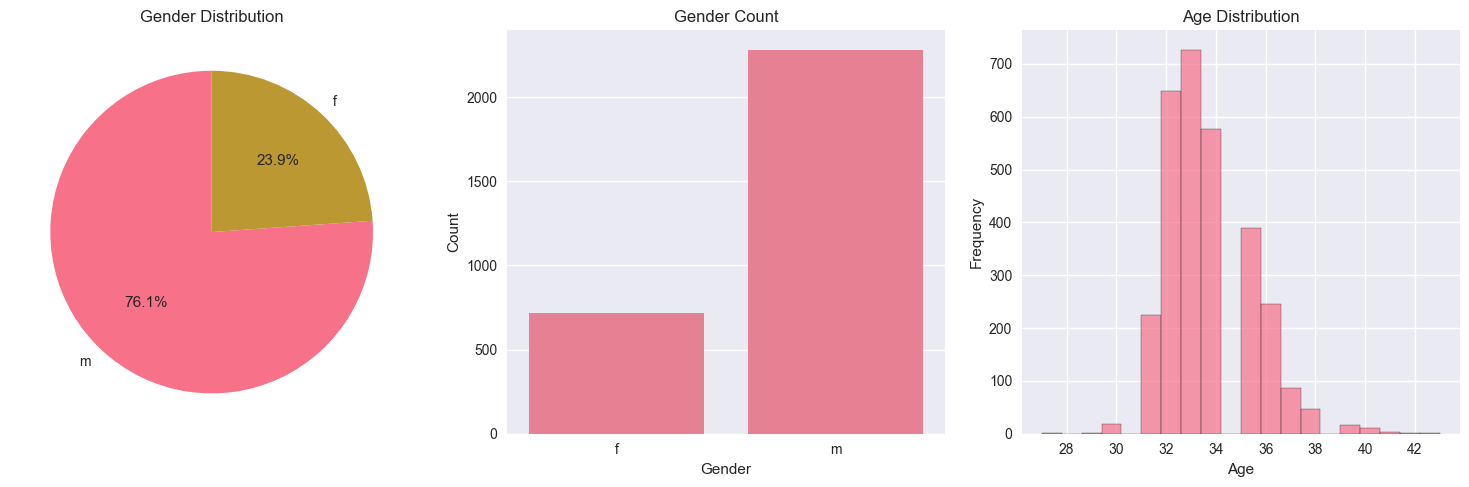


Gender Distribution:
Gender
m    2282
f     716
Name: count, dtype: int64

Age Statistics:
count    2998.000000
mean       33.573382
std         1.751434
min        27.000000
25%        32.000000
50%        33.000000
75%        35.000000
max        43.000000
Name: Age, dtype: float64


In [4]:
# ========================================================================================
# CELL 4: Category 1 - Personal Information Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 1: PERSONAL INFORMATION ANALYSIS")
print("="*60)

# # Personal info features: ID, Gender, DOB
# df_ori['DOB'] = pd.to_datetime(df_ori['DOB'])
# df_ori['Age'] = 2014 - df_ori['DOB'].dt.year  # Assuming data collected around 2014
# personal_cols = ['ID', 'Gender', 'DOB', 'Age']
personal_cols = ['ID', 'Gender', 'DOB']
# Gender distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

# Convert DOB to datetime and extract age
df['DOB'] = pd.to_datetime(df['DOB'], format='%d/%m/%Y')
df['Age'] = 2024 - df['DOB'].dt.year

plt.subplot(1, 3, 3)
plt.hist(df['Age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nGender Distribution:")
print(df['Gender'].value_counts())
print(f"\nAge Statistics:")
print(df['Age'].describe())

In [5]:
def classify_board(s):
    if pd.isna(s) or str(s).lower() == 'unknown':
        return 'Unknown'
    s = str(s).lower()
    if 'cbse' in s:    return 'CBSE'
    if 'icse' in s or 'isc' in s: return 'ICSE'
    if any(tok in s for tok in ['state board','ssc','sslc','matric','stateboard']):
        return 'State Board'
    if 'rbse' in s or 'rajasthan' in s: return 'RBSE'
    if 'up board' in s or 'uttar pradesh' in s: return 'UP Board'
    if 'mp board' in s or 'mpbse' in s: return 'MP Board'
    if 'wbbse' in s or 'west bengal' in s: return 'WB Board'
    if 'kseeb' in s or 'karnataka' in s: return 'Karnataka Board'
    if 'tamil' in s or 'tn state board' in s: return 'TN Board'
    if 'gujarat' in s:  return 'Gujarat Board'
    if 'bseb' in s or 'bihar' in s: return 'Bihar Board'
    if 'andhra' in s or 'apssc' in s: return 'AP Board'
    if 'kerala' in s:   return 'Kerala Board'
    return 'Other'

df['10board_group'] = df['10board'].apply(classify_board)
df['12board_group'] = df['12board'].apply(classify_board)

In [6]:
df.head(20)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,10board_group,12board_group
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,34,CBSE,CBSE
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,34,CBSE,CBSE
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,35,State Board,Other
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,33,CBSE,CBSE
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,34,CBSE,CBSE
5,609356,f,1989-12-02,83.16,icse,2007,77.00,cbse,10950,1,...,NaN,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000,35,ICSE,CBSE
6,1081649,f,1989-04-17,72.50,state board,2007,53.20,state board,14381,2,...,NaN,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000,35,State Board,State Board
7,610842,f,1991-04-11,77.00,state board,2009,88.00,state board,13208,2,...,NaN,0.1282,0.5454,0.4711,0.90660,-0.2859,105000,33,State Board,State Board
8,1183070,m,1992-11-25,76.80,state board,2010,87.70,state board,5338,2,...,NaN,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000,32,State Board,State Board
9,794062,f,1993-03-15,57.00,state board,2009,73.00,state board,8346,2,...,NaN,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000,31,State Board,State Board


CATEGORY 2: STANDARD X (10th GRADE) ANALYSIS


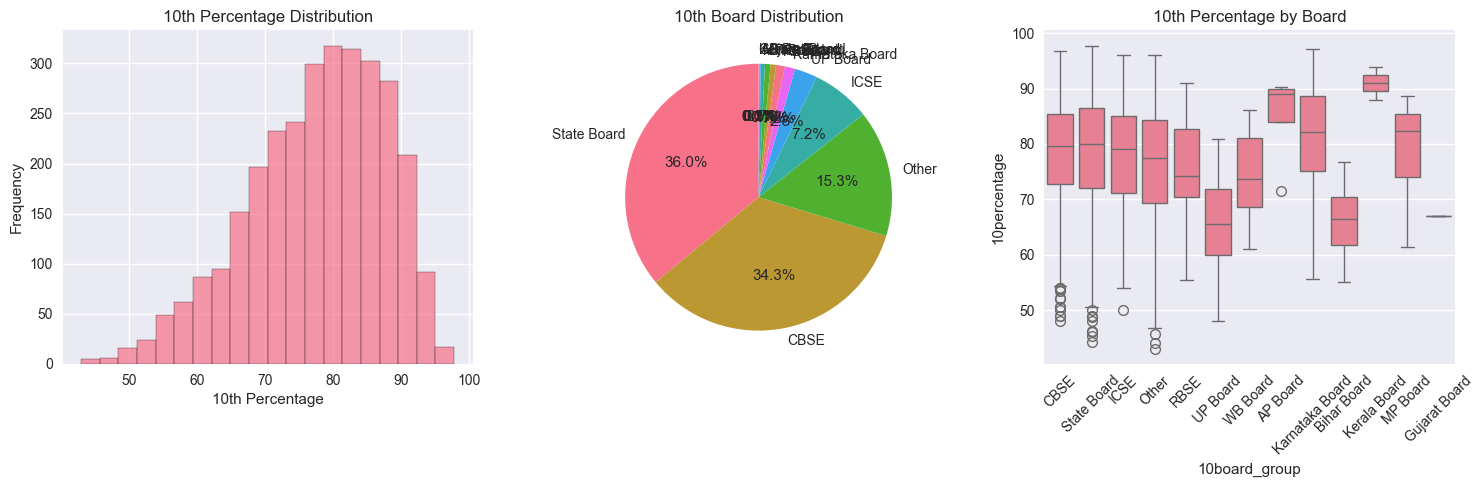


10th Percentage Statistics:
count    2998.000000
mean       77.666264
std        10.002785
min        43.000000
25%        71.140000
50%        78.965000
75%        85.600000
max        97.760000
Name: 10percentage, dtype: float64

10th Board Distribution:
10board_group
State Board        1079
CBSE               1029
Other               460
ICSE                215
UP Board             83
Karnataka Board      37
RBSE                 32
WB Board             20
Bihar Board          20
MP Board             15
AP Board              5
Kerala Board          2
Gujarat Board         1
Name: count, dtype: int64


In [7]:
# ========================================================================================
# CELL 5: Category 2 - Standard X (10th Grade) Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 2: STANDARD X (10th GRADE) ANALYSIS")
print("="*60)

# Standard X features: 10percentage, 10board
std_x_cols = ['10percentage', '10board_group']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['10percentage'], bins=20, alpha=0.7, edgecolor='black')
plt.title('10th Percentage Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
board_10_counts = df['10board_group'].value_counts()
plt.pie(board_10_counts.values, labels=board_10_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('10th Board Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='10board_group', y='10percentage')
plt.title('10th Percentage by Board')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\n10th Percentage Statistics:") 
print(df['10percentage'].describe())
print(f"\n10th Board Distribution:")
print(df['10board_group'].value_counts())


CATEGORY 3: STANDARD XII (12th GRADE) ANALYSIS


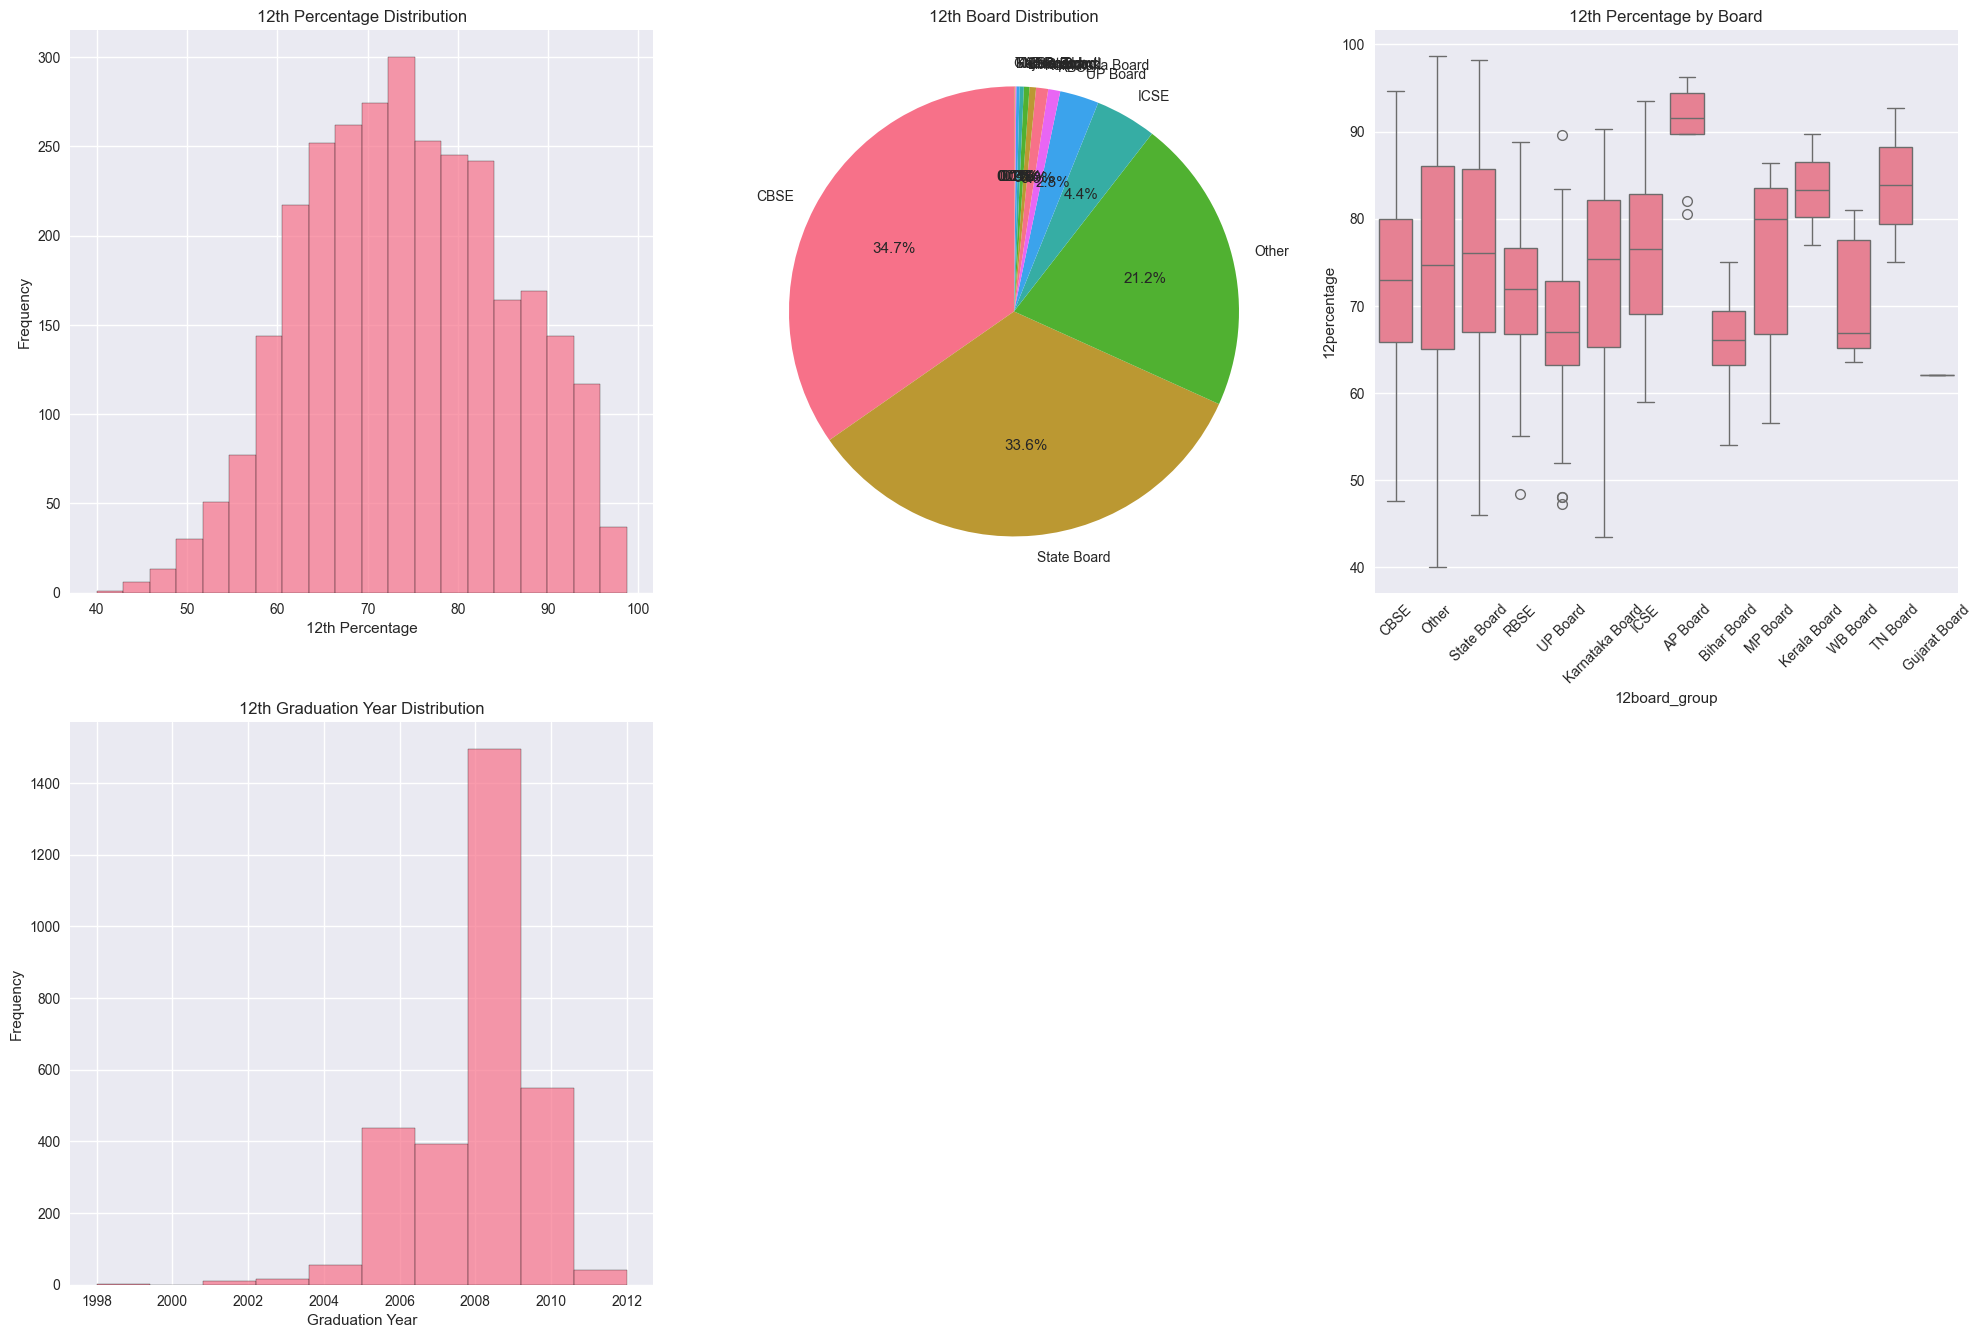


12th Percentage Statistics:
count    2998.000000
mean       74.341061
std        11.120299
min        40.000000
25%        66.000000
50%        74.000000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

12th Board Distribution:
12board_group
CBSE               1040
State Board        1006
Other               637
ICSE                132
UP Board             84
RBSE                 26
Karnataka Board      26
MP Board             14
Bihar Board          12
AP Board              9
WB Board              7
Kerala Board          2
TN Board              2
Gujarat Board         1
Name: count, dtype: int64

12th Graduation Year Statistics:
count    2998.000000
mean     2008.080720
std         1.631814
min      1998.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2012.000000
Name: 12graduation, dtype: float64


In [8]:
# ========================================================================================
# CELL 6: Category 3 - Standard XII (12th Grade) Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 3: STANDARD XII (12th GRADE) ANALYSIS")
print("="*60)

# Standard XII features: 12percentage, 12board, 12graduation (year)
std_xii_cols = ['12percentage', '12board', '12graduation']

plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
plt.hist(df['12percentage'], bins=20, alpha=0.7, edgecolor='black')
plt.title('12th Percentage Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('Frequency')

plt.subplot(3,3, 2)
board_12_counts = df['12board_group'].value_counts()
plt.pie(board_12_counts.values, labels=board_12_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('12th Board Distribution')

plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='12board_group', y='12percentage')
plt.title('12th Percentage by Board')
plt.xticks(rotation=45)

plt.subplot(3, 3, 4)
plt.hist(df['12graduation'], bins=10, alpha=0.7, edgecolor='black')
plt.title('12th Graduation Year Distribution')
plt.xlabel('Graduation Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\n12th Percentage Statistics:")
print(df['12percentage'].describe())
print(f"\n12th Board Distribution:")
print(df['12board_group'].value_counts())
print(f"\n12th Graduation Year Statistics:")
print(df['12graduation'].describe())

CATEGORY 4: BACHELOR'S DEGREE ANALYSIS


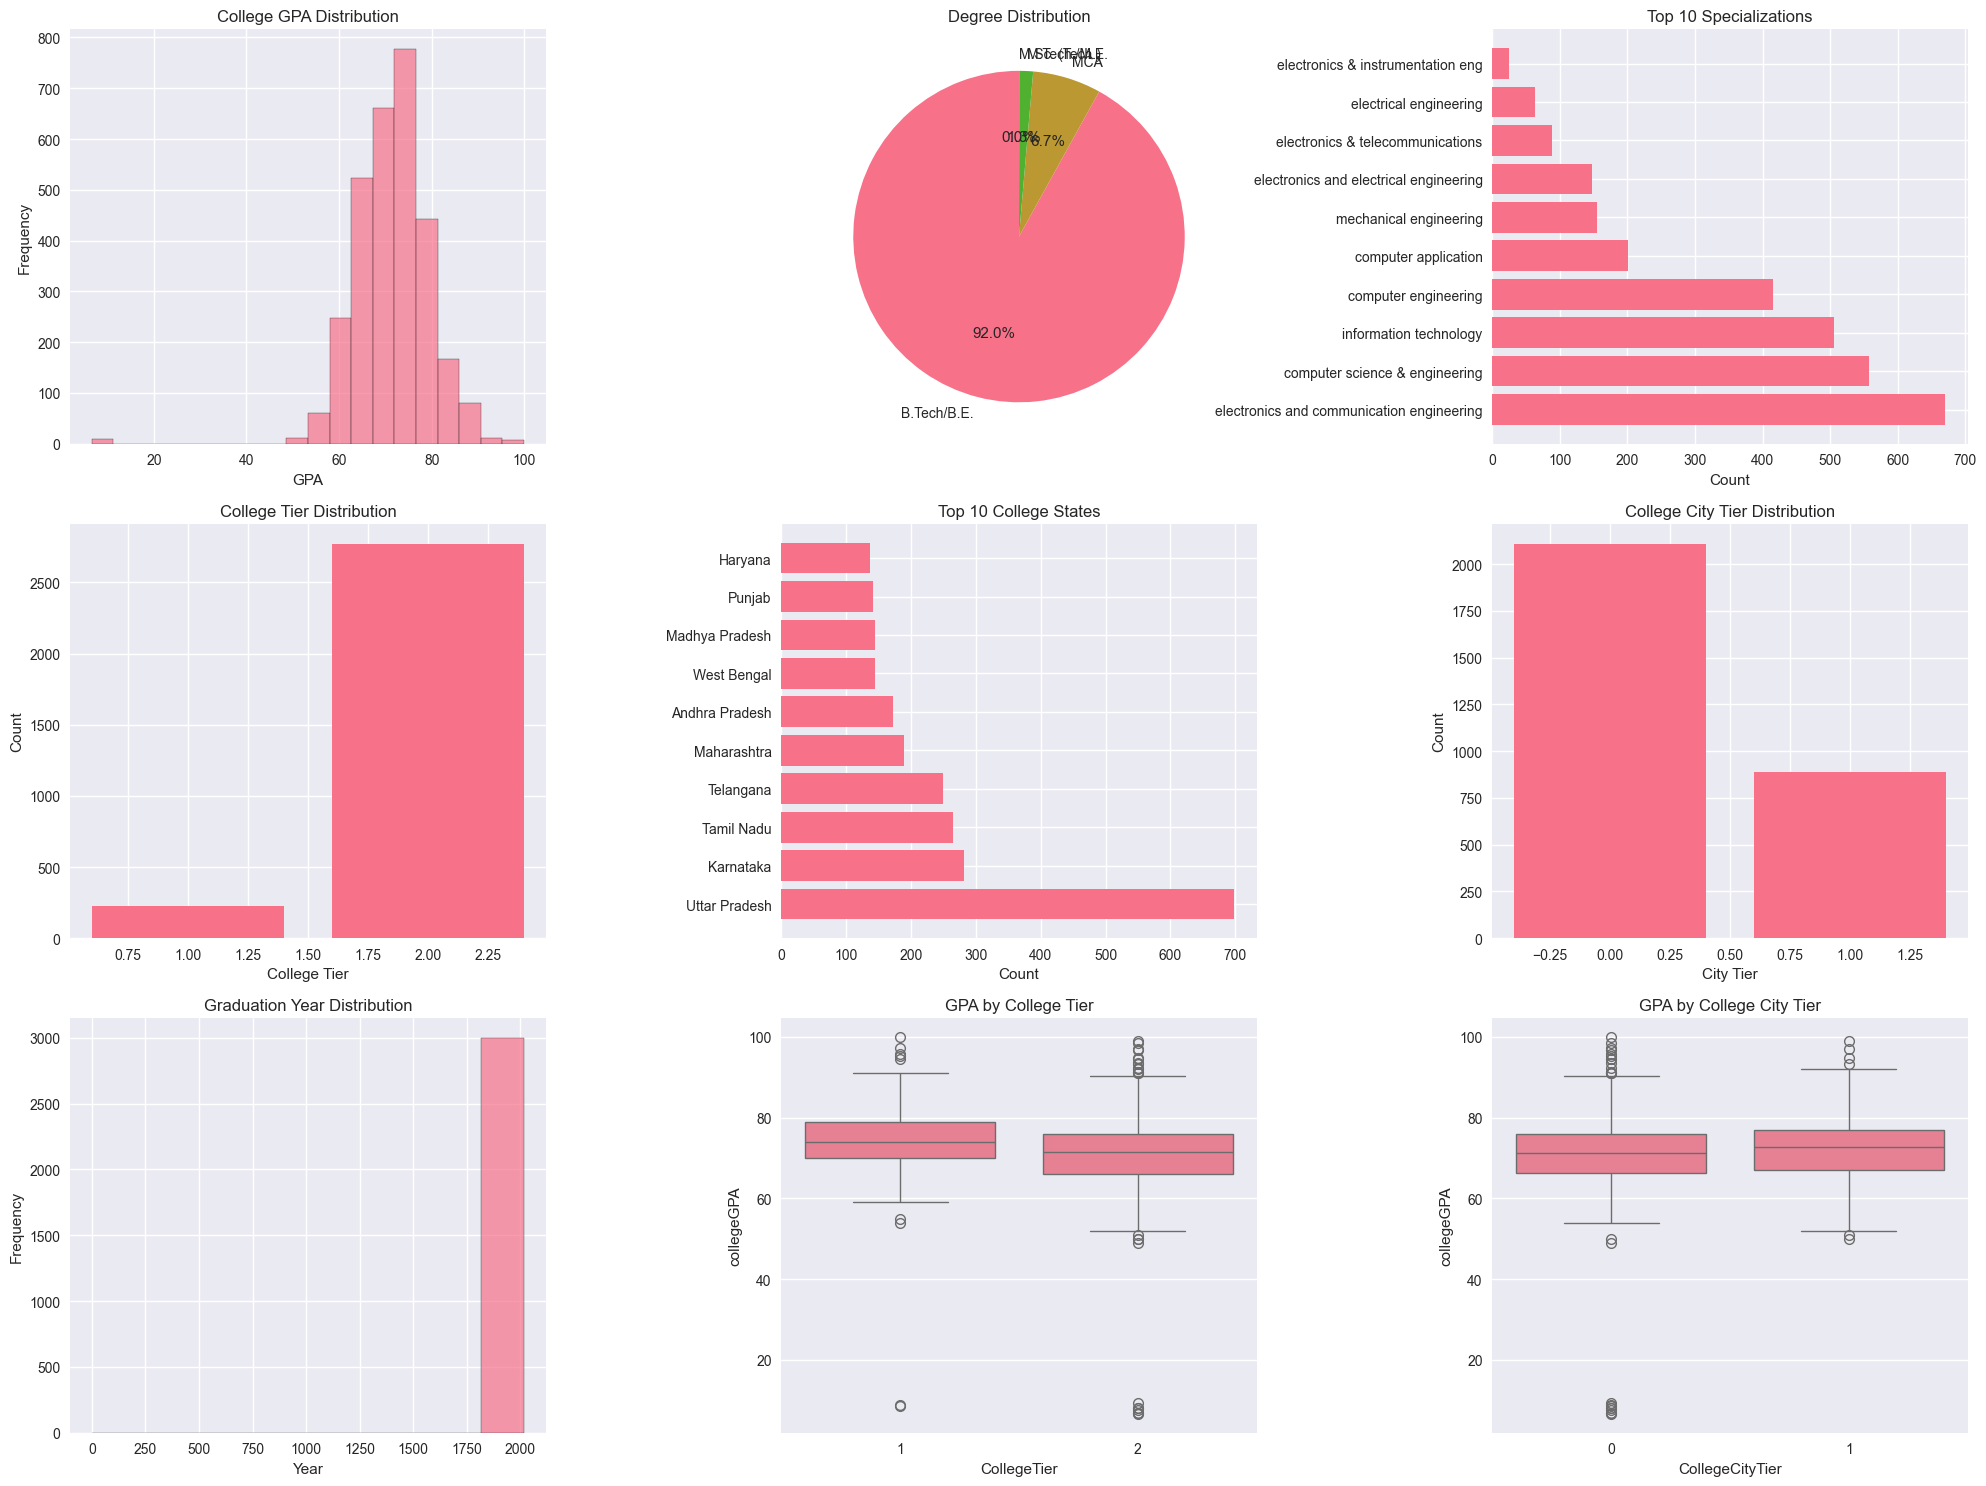


College GPA Statistics:
count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64

Degree Distribution:
Degree
B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: count, dtype: int64

Top 10 Specializations:
Specialization
electronics and communication engineering    670
computer science & engineering               557
information technology                       506
computer engineering                         415
computer application                         201
mechanical engineering                       155
electronics and electrical engineering       148
electronics & telecommunications              89
electrical engineering                        63
electronics & instrumentation eng             24
Name: count, dtype: int64

College Tier Distribution:
CollegeTier
1     226
2    2772
Name: count, dt

In [9]:
# ========================================================================================
# CELL 7: Category 4 - Bachelor's Degree Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 4: BACHELOR'S DEGREE ANALYSIS")
print("="*60)

# Bachelor's degree features: Degree, Specialization, collegeGPA, CollegeID, CollegeTier, 
# CollegeState, CollegeCityID, CollegeCityTier, GraduationYear
bachelor_cols = ['Degree', 'Specialization', 'collegeGPA', 'CollegeID', 'CollegeTier', 
                'CollegeState', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear']

plt.figure(figsize=(20, 15))

# College GPA distribution
plt.subplot(3, 3, 1)
plt.hist(df['collegeGPA'], bins=20, alpha=0.7, edgecolor='black')
plt.title('College GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Degree distribution
plt.subplot(3, 3, 2)
degree_counts = df['Degree'].value_counts()
plt.pie(degree_counts.values, labels=degree_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Degree Distribution')

# Specialization distribution (top 10)
plt.subplot(3, 3, 3)
top_specializations = df['Specialization'].value_counts().head(10)
plt.barh(range(len(top_specializations)), top_specializations.values)
plt.yticks(range(len(top_specializations)), top_specializations.index)
plt.title('Top 10 Specializations')
plt.xlabel('Count')

# College Tier distribution
plt.subplot(3, 3, 4)
tier_counts = df['CollegeTier'].value_counts().sort_index()
plt.bar(tier_counts.index, tier_counts.values)
plt.title('College Tier Distribution')
plt.xlabel('College Tier')
plt.ylabel('Count')

# College State distribution (top 10)
plt.subplot(3, 3, 5)
top_states = df['CollegeState'].value_counts().head(10)
plt.barh(range(len(top_states)), top_states.values)
plt.yticks(range(len(top_states)), top_states.index)
plt.title('Top 10 College States')
plt.xlabel('Count')

# College City Tier distribution
plt.subplot(3, 3, 6)
city_tier_counts = df['CollegeCityTier'].value_counts().sort_index()
plt.bar(city_tier_counts.index, city_tier_counts.values)
plt.title('College City Tier Distribution')
plt.xlabel('City Tier')
plt.ylabel('Count')

# Graduation Year distribution
plt.subplot(3, 3, 7)
plt.hist(df['GraduationYear'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Graduation Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

# GPA vs College Tier
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='CollegeTier', y='collegeGPA')
plt.title('GPA by College Tier')

# GPA vs City Tier
plt.subplot(3, 3, 9)
sns.boxplot(data=df, x='CollegeCityTier', y='collegeGPA')
plt.title('GPA by College City Tier')

plt.tight_layout()
plt.show()

print(f"\nCollege GPA Statistics:")
print(df['collegeGPA'].describe())
print(f"\nDegree Distribution:")
print(df['Degree'].value_counts())
print(f"\nTop 10 Specializations:")
print(df['Specialization'].value_counts().head(10))
print(f"\nCollege Tier Distribution:")
print(df['CollegeTier'].value_counts().sort_index())

CATEGORY 5: TEST SCORES ANALYSIS


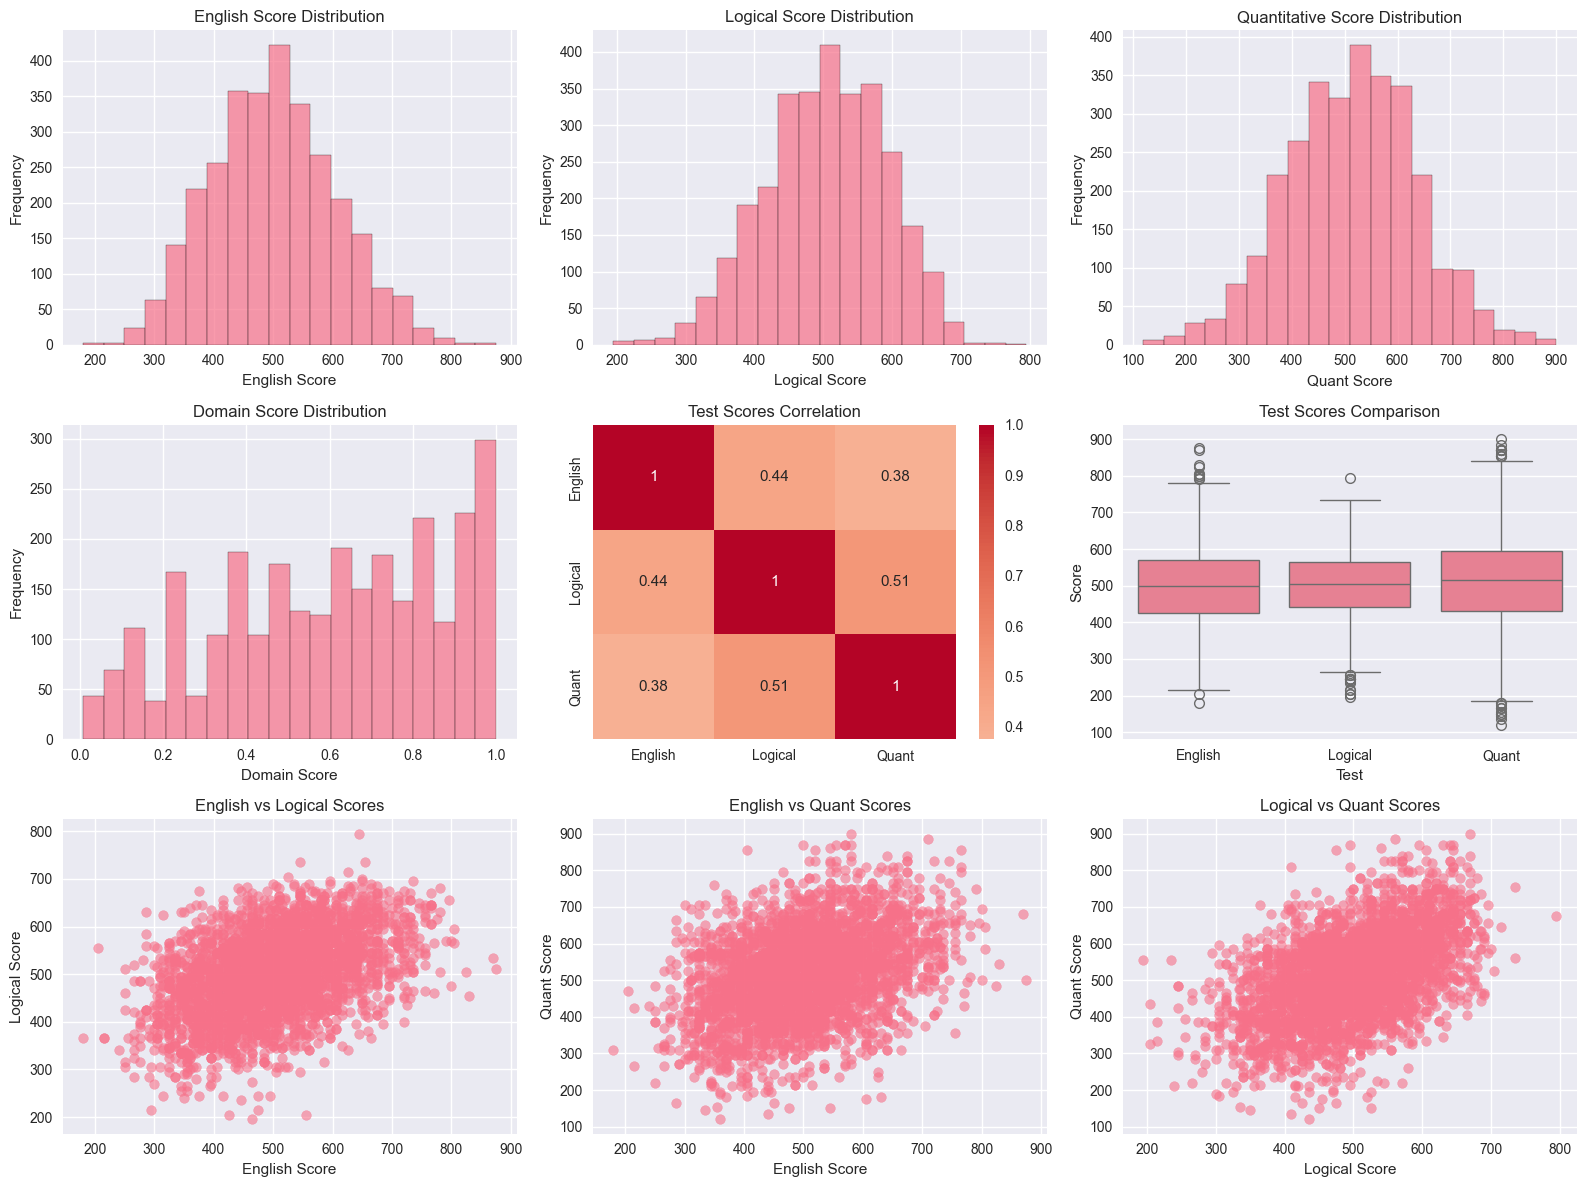


Test Scores Statistics:

English Score:
count    2998.000000
mean      501.066378
std       105.304512
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

Logical Score:
count    2998.000000
mean      500.431621
std        87.299850
min       195.000000
25%       441.250000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

Quant Score:
count    2998.000000
mean      514.137759
std       122.194955
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

Domain Score:
count    2819.000000
mean        0.604241
std         0.273201
min         0.008155
25%         0.376060
50%         0.635979
75%         0.842248
max         0.999910
Name: Domain, dtype: float64


In [10]:
# ========================================================================================
# CELL 8: Category 5 - Test Scores Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 5: TEST SCORES ANALYSIS")
print("="*60)

# Test score features: English, Logical, Quant, Domain
test_cols = ['English', 'Logical', 'Quant', 'Domain']

plt.figure(figsize=(16, 12))

# Individual test score distributions
plt.subplot(3, 3, 1)
plt.hist(df['English'], bins=20, alpha=0.7, edgecolor='black')
plt.title('English Score Distribution')
plt.xlabel('English Score')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
plt.hist(df['Logical'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Logical Score Distribution')
plt.xlabel('Logical Score')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
plt.hist(df['Quant'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Quantitative Score Distribution')
plt.xlabel('Quant Score')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
plt.hist(df['Domain'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Domain Score Distribution')
plt.xlabel('Domain Score')
plt.ylabel('Frequency')

# Correlation between test scores
plt.subplot(3, 3, 5)
test_scores_df = df[['English', 'Logical', 'Quant']].dropna()
correlation_matrix = test_scores_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Test Scores Correlation')

# Box plots for test scores
plt.subplot(3, 3, 6)
test_scores_melted = pd.melt(df[['English', 'Logical', 'Quant']], var_name='Test', value_name='Score')
sns.boxplot(data=test_scores_melted, x='Test', y='Score')
plt.title('Test Scores Comparison')

# Scatter plots
plt.subplot(3, 3, 7)
plt.scatter(df['English'], df['Logical'], alpha=0.6)
plt.xlabel('English Score')
plt.ylabel('Logical Score')
plt.title('English vs Logical Scores')

plt.subplot(3, 3, 8)
plt.scatter(df['English'], df['Quant'], alpha=0.6)
plt.xlabel('English Score')
plt.ylabel('Quant Score')
plt.title('English vs Quant Scores')

plt.subplot(3, 3, 9)
plt.scatter(df['Logical'], df['Quant'], alpha=0.6)
plt.xlabel('Logical Score')
plt.ylabel('Quant Score')
plt.title('Logical vs Quant Scores')

plt.tight_layout()
plt.show()

print(f"\nTest Scores Statistics:")
for col in ['English', 'Logical', 'Quant', 'Domain']:
    print(f"\n{col} Score:")
    print(df[col].describe())


CATEGORY 6: SUBJECT SCORES ANALYSIS
Subject Scores Availability:
ComputerProgramming: 2348/2998 (78.3%)
ElectronicsAndSemicon: 865/2998 (28.9%)
ComputerScience: 700/2998 (23.3%)
MechanicalEngg: 187/2998 (6.2%)
ElectricalEngg: 122/2998 (4.1%)
TelecomEngg: 274/2998 (9.1%)
CivilEngg: 26/2998 (0.9%)


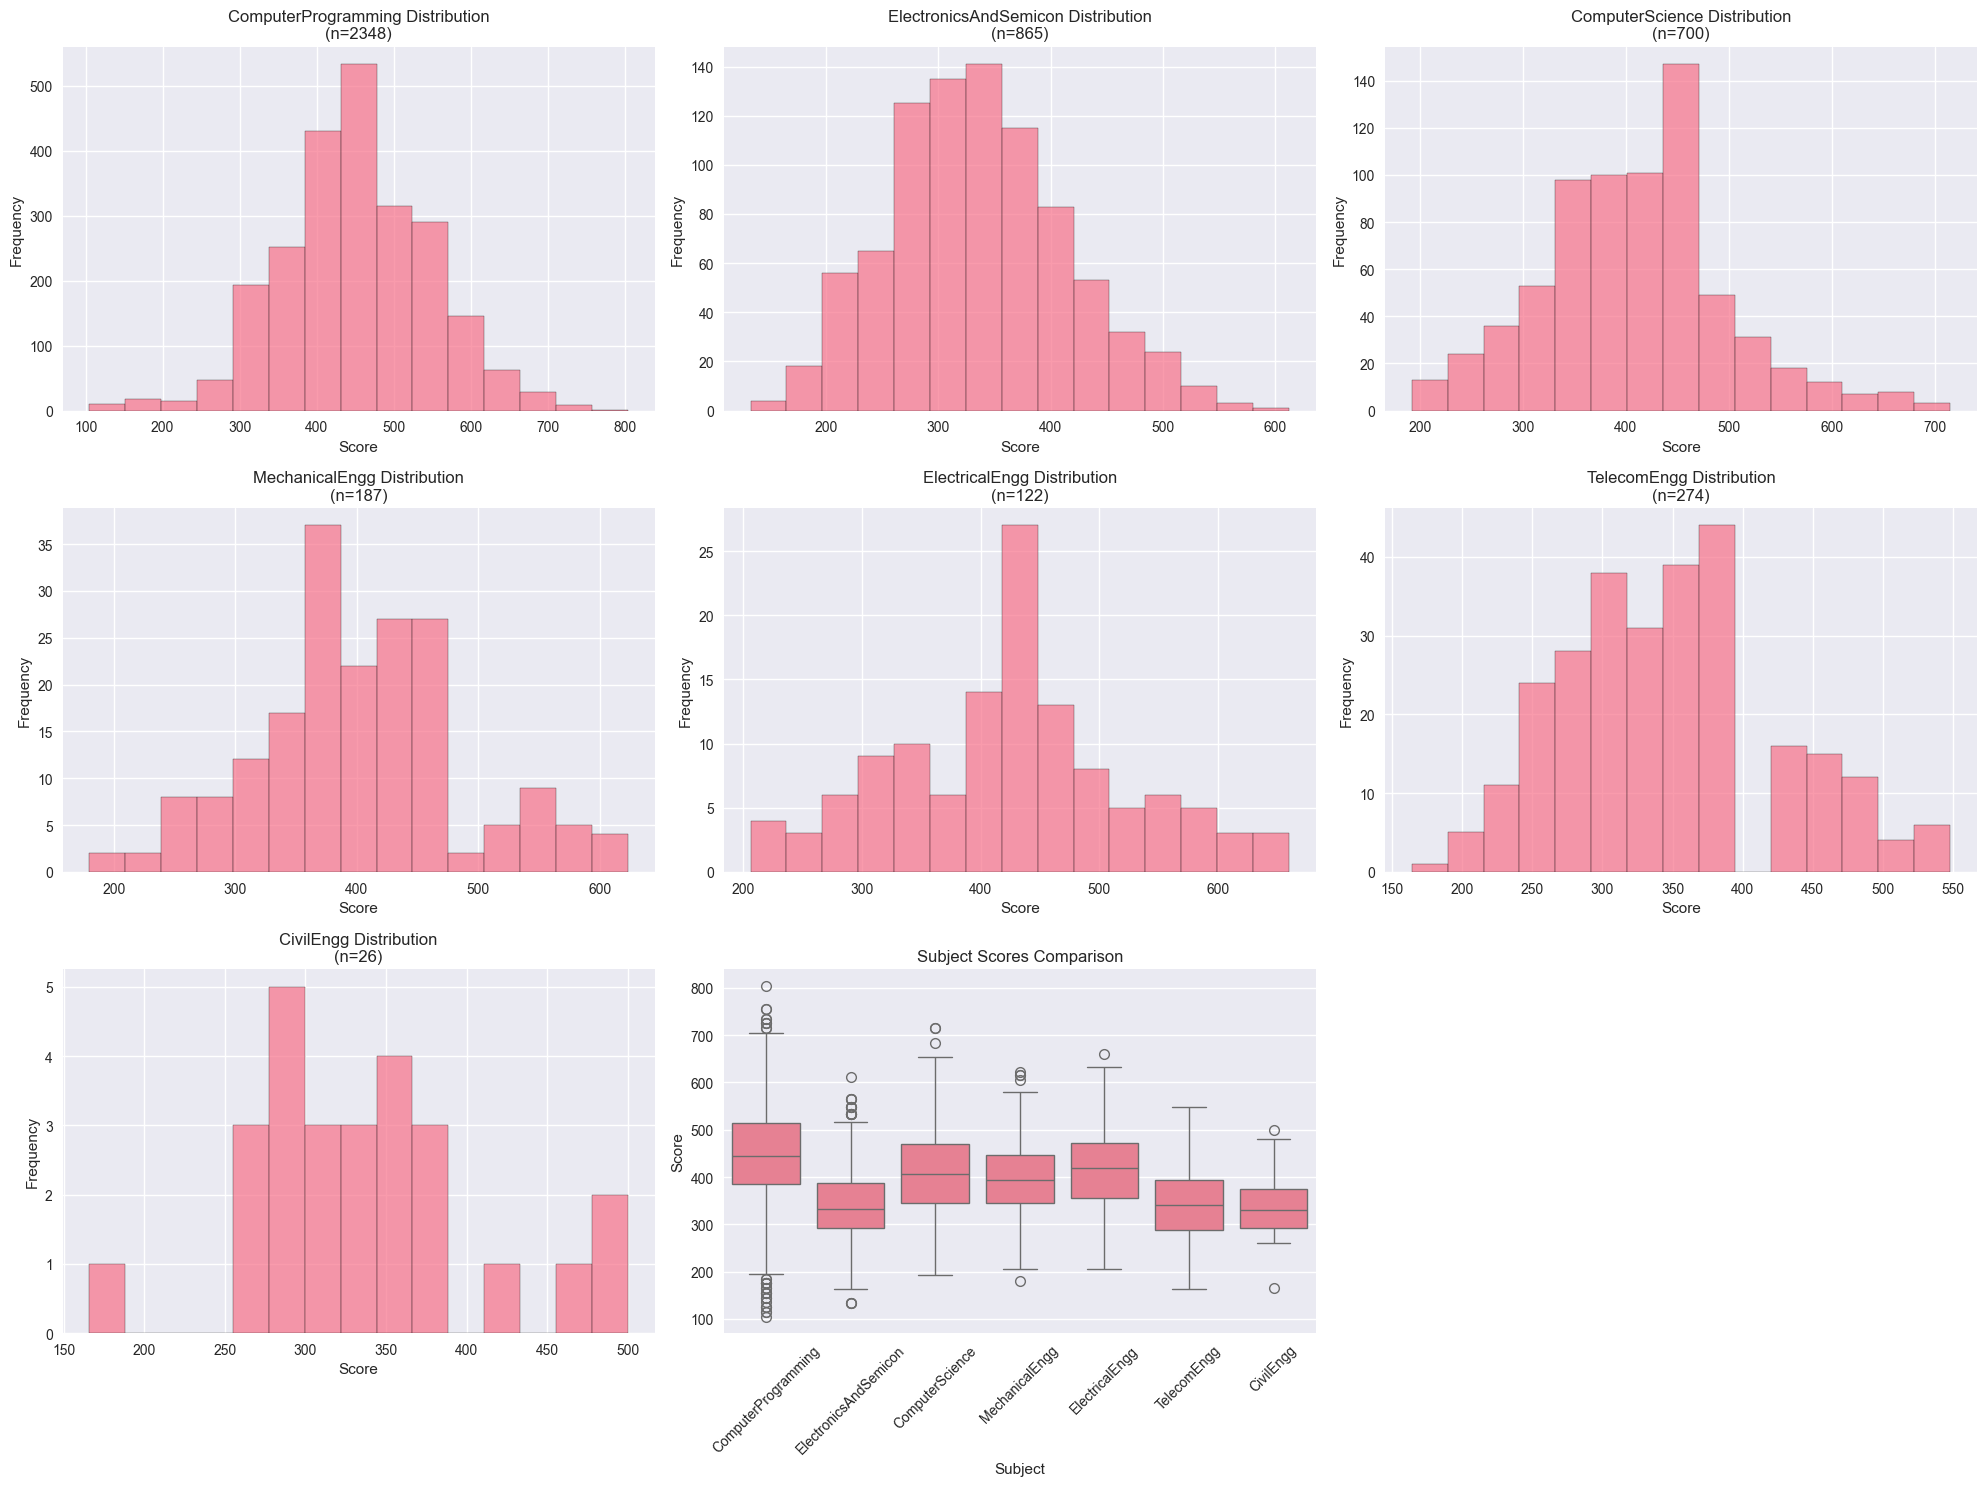


Subject Scores Statistics:

ComputerProgramming:
count    2348.000000
mean      449.553663
std        96.875759
min       105.000000
25%       385.000000
50%       445.000000
75%       515.000000
max       804.000000
Name: ComputerProgramming, dtype: float64

ElectronicsAndSemicon:
count    865.000000
mean     335.982659
std       80.732918
min      133.000000
25%      292.000000
50%      333.000000
75%      388.000000
max      612.000000
Name: ElectronicsAndSemicon, dtype: float64

ComputerScience:
count    700.000000
mean     406.501429
std       89.728704
min      192.000000
25%      346.000000
50%      407.000000
75%      469.000000
max      715.000000
Name: ComputerScience, dtype: float64

MechanicalEngg:
count    187.000000
mean     402.026738
std       85.554638
min      180.000000
25%      346.000000
50%      393.000000
75%      446.000000
max      623.000000
Name: MechanicalEngg, dtype: float64

ElectricalEngg:
count    122.000000
mean     423.336066
std       96.231609
min  

In [11]:
# ========================================================================================
# CELL 9: Category 6 - Subject Scores Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 6: SUBJECT SCORES ANALYSIS")
print("="*60)

# Subject score features
subject_cols = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
               'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Check availability of each subject score
print("Subject Scores Availability:")
for col in subject_cols:
    non_null_count = df[col].notna().sum()
    total_count = len(df)
    percentage = (non_null_count / total_count) * 100
    print(f"{col}: {non_null_count}/{total_count} ({percentage:.1f}%)")

# Plot subject scores distributions
plt.figure(figsize=(20, 15))

for i, col in enumerate(subject_cols, 1):
    plt.subplot(3, 3, i)
    subject_data = df[col].dropna()
    if len(subject_data) > 0:
        plt.hist(subject_data, bins=15, alpha=0.7, edgecolor='black')
        plt.title(f'{col} Distribution\n(n={len(subject_data)})')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'No Data Available', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'{col} Distribution\n(No Data)')

# Subject scores comparison (only for subjects with data)
plt.subplot(3, 3, 8)
available_subjects = []
for col in subject_cols:
    if df[col].notna().sum() > 0:
        available_subjects.append(col)

if len(available_subjects) > 1:
    subject_scores_melted = pd.melt(df[available_subjects], var_name='Subject', value_name='Score')
    subject_scores_melted = subject_scores_melted.dropna()
    sns.boxplot(data=subject_scores_melted, x='Subject', y='Score')
    plt.title('Subject Scores Comparison')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Insufficient Data for Comparison', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

print(f"\nSubject Scores Statistics:")
for col in subject_cols:
    if df[col].notna().sum() > 0:
        print(f"\n{col}:")
        print(df[col].describe())

CATEGORY 7: APTITUDE SCORES ANALYSIS


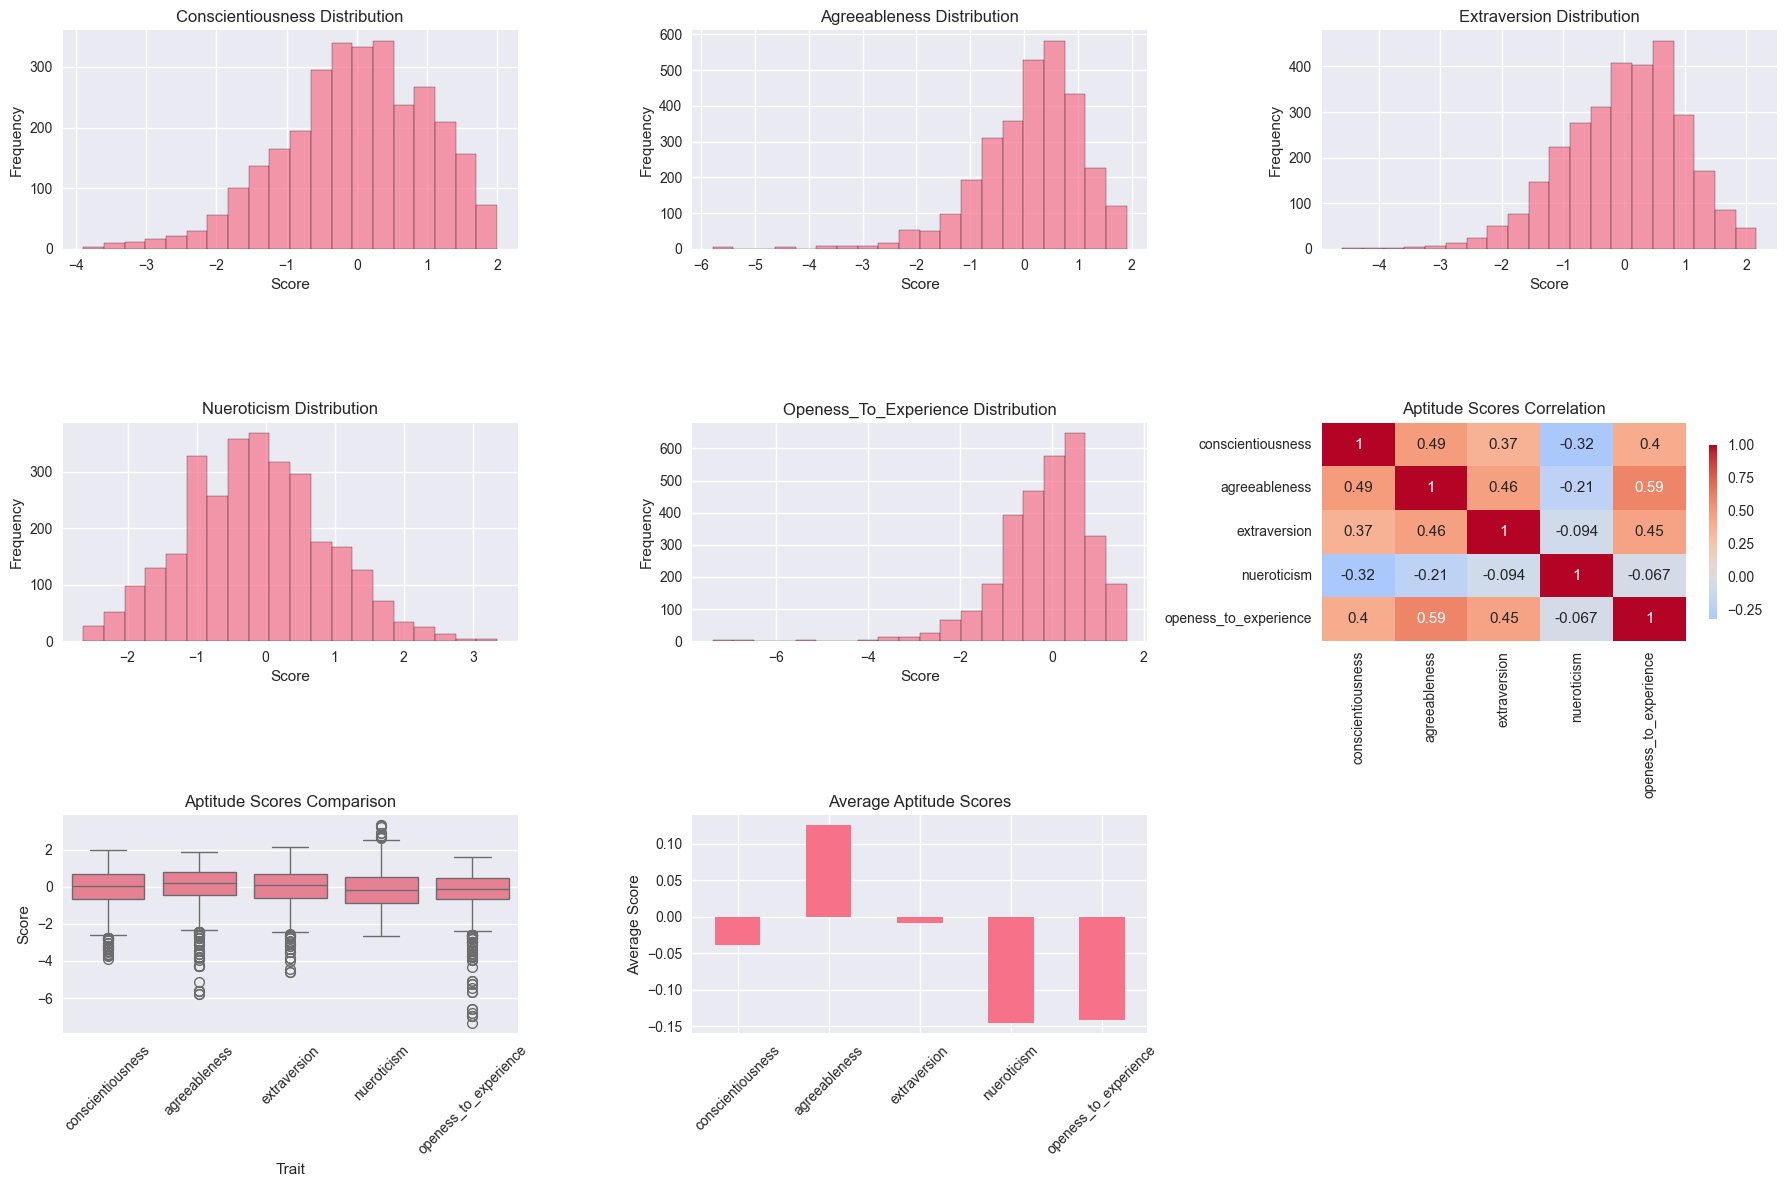


Aptitude Scores Statistics:

Conscientiousness:
count    2998.000000
mean       -0.038714
std         1.024974
min        -3.893300
25%        -0.649100
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

Agreeableness:
count    2998.000000
mean        0.126217
std         0.955831
min        -5.781600
25%        -0.435300
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64

Extraversion:
count    2998.000000
mean       -0.008662
std         0.962695
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.161700
Name: extraversion, dtype: float64

Nueroticism:
count    2998.000000
mean       -0.145965
std         1.012901
min        -2.643000
25%        -0.868200
50%        -0.172700
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64

Openess_To_Experience:
count    2998.000000
mean       -0.141111
std         1.007134
mi

In [12]:
# ========================================================================================
# CELL 10: Category 7 - Aptitude Scores Analysis
# ========================================================================================
print("="*60)
print("CATEGORY 7: APTITUDE SCORES ANALYSIS")
print("="*60)

# Aptitude score features (Big Five personality traits)
aptitude_cols = ['conscientiousness', 'agreeableness', 'extraversion', 
                'nueroticism', 'openess_to_experience']

plt.figure(figsize=(18, 12))

# Individual aptitude score distributions
for i, col in enumerate(aptitude_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{col.title()} Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

# Correlation matrix for aptitude scores
plt.subplot(3, 3, 6)
aptitude_df = df[aptitude_cols].dropna()
if len(aptitude_df) > 0:
    correlation_matrix = aptitude_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8})
    plt.title('Aptitude Scores Correlation')
else:
    plt.text(0.5, 0.5, 'No Data Available', ha='center', va='center', transform=plt.gca().transAxes)

# Box plot comparison
plt.subplot(3, 3, 7)
aptitude_melted = pd.melt(df[aptitude_cols], var_name='Trait', value_name='Score')
aptitude_melted = aptitude_melted.dropna()
sns.boxplot(data=aptitude_melted, x='Trait', y='Score')
plt.title('Aptitude Scores Comparison')
plt.xticks(rotation=45)

# Radar chart preparation data
plt.subplot(3, 3, 8)
aptitude_means = df[aptitude_cols].mean()
aptitude_means.plot(kind='bar')
plt.title('Average Aptitude Scores')
plt.ylabel('Average Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nAptitude Scores Statistics:")
for col in aptitude_cols:
    print(f"\n{col.title()}:")
    print(df[col].describe())

# Calculate personality profile summary
print(f"\nPersonality Profile Summary (Mean Scores):")
personality_summary = df[aptitude_cols].mean().sort_values(ascending=False)
for trait, score in personality_summary.items():
    print(f"{trait.title()}: {score:.3f}")

In [13]:
# ========================================================================================
# CELL 11: Salary Analysis
# ========================================================================================
print("="*60)

# Create salary ranges with 150k increments from minimum salary
min_salary = df['Salary'].min()
max_salary = df['Salary'].max()
range_increment = 150000

print(f"Salary range: ₹{min_salary:,} to ₹{max_salary:,}")
print(f"Using increment of ₹{range_increment:,}")

# Calculate number of ranges needed
num_ranges = int(np.ceil((max_salary - min_salary) / range_increment))
print(f"Number of salary ranges: {num_ranges}")

# Create salary range boundaries
range_boundaries = []
for i in range(num_ranges + 1):
    boundary = min_salary + (i * range_increment)
    range_boundaries.append(boundary)

#print(f"Range boundaries: {[f'₹{b:,}' for b in range_boundaries]}")

# Create salary range labels
range_labels = []
for i in range(num_ranges):
    start = range_boundaries[i]
    end = range_boundaries[i + 1]
    range_labels.append(f"₹{start//1000}K-₹{end//1000}K")

#print(f"Salary range classes: {range_labels}")

# Create salary range classification target
df['Salary_Range_Class'] = pd.cut(df['Salary'], 
                                       bins=range_boundaries, 
                                       labels=range_labels, 
                                       include_lowest=True)

# Check distribution of salary ranges
range_distribution = df['Salary_Range_Class'].value_counts().sort_index()
print(f"\nSalary range distribution:")
print(range_distribution)

Salary range: ₹35,000 to ₹4,000,000
Using increment of ₹150,000
Number of salary ranges: 27

Salary range distribution:
Salary_Range_Class
₹35K-₹185K        795
₹185K-₹335K      1228
₹335K-₹485K       683
₹485K-₹635K       199
₹635K-₹785K        48
₹785K-₹935K        19
₹935K-₹1085K        2
₹1085K-₹1235K       9
₹1235K-₹1385K       3
₹1385K-₹1535K       2
₹1535K-₹1685K       0
₹1685K-₹1835K       1
₹1835K-₹1985K       0
₹1985K-₹2135K       3
₹2135K-₹2285K       0
₹2285K-₹2435K       1
₹2435K-₹2585K       1
₹2585K-₹2735K       1
₹2735K-₹2885K       0
₹2885K-₹3035K       0
₹3035K-₹3185K       0
₹3185K-₹3335K       0
₹3335K-₹3485K       0
₹3485K-₹3635K       1
₹3635K-₹3785K       0
₹3785K-₹3935K       0
₹3935K-₹4085K       2
Name: count, dtype: int64


=== ACADEMIC PERFORMANCE vs SALARY CORRELATION ===
10percentage: r = 0.181, p = 0.000
12percentage: r = 0.173, p = 0.000
collegeGPA: r = 0.132, p = 0.000
Overall_Academic_Score: r = 0.206, p = 0.000


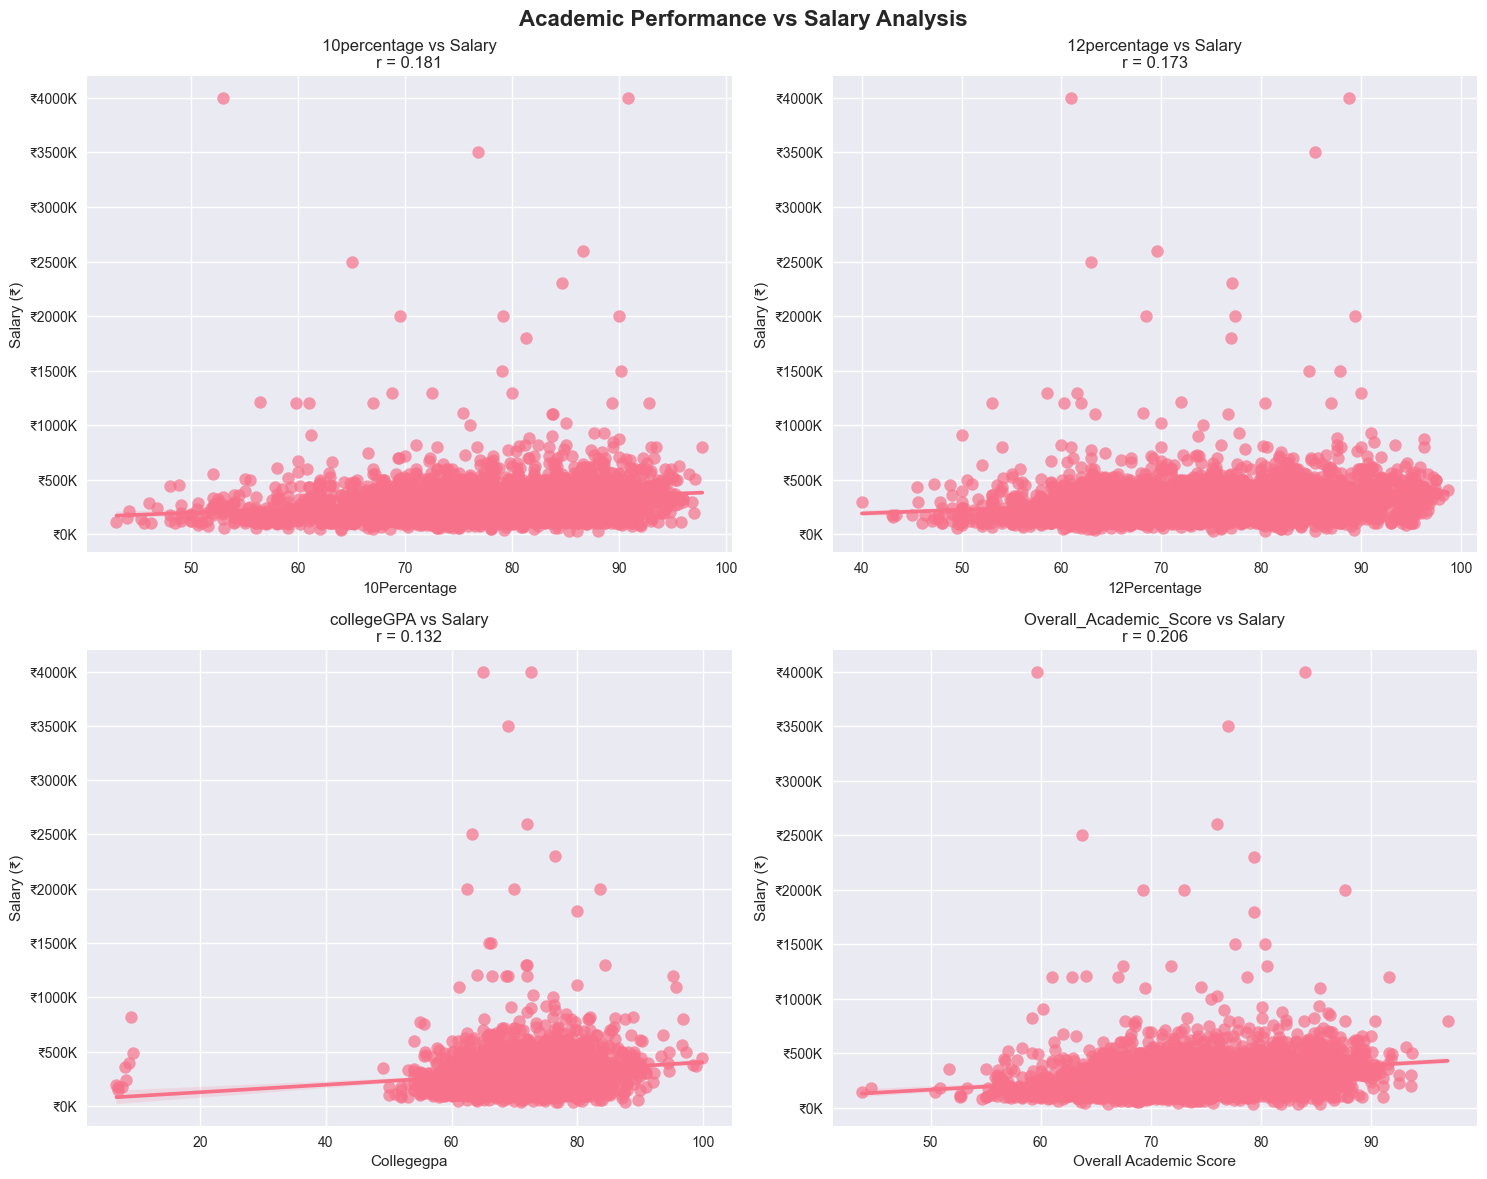

In [14]:
# ========================================================================================
# CELL 4: Analysis 1 - Academic Performance vs Salary Correlation
# ========================================================================================

# Correlation analysis between academic metrics and salary
df['Overall_Academic_Score'] = (df['10percentage'] + df['12percentage'] + df['collegeGPA']) / 3
academic_cols = ['10percentage', '12percentage', 'collegeGPA', 'Overall_Academic_Score']

print("=== ACADEMIC PERFORMANCE vs SALARY CORRELATION ===")

# Calculate correlations
correlations = {}
for col in academic_cols:
    corr_pearson, p_value = pearsonr(df[col], df['Salary'])
    correlations[col] = {'correlation': corr_pearson, 'p_value': p_value}
    print(f"{col}: r = {corr_pearson:.3f}, p = {p_value:.3f}")

# Create correlation visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Academic Performance vs Salary Analysis', fontsize=16, fontweight='bold')

# Individual scatter plots
for i, col in enumerate(academic_cols):
    row, col_idx = i // 2, i % 2
    ax = axes[row, col_idx]
    
    # Scatter plot with trend line
    sns.regplot(data=df, x=col, y='Salary', ax=ax, scatter_kws={'s': 80, 'alpha': 0.7})
    ax.set_title(f'{col} vs Salary\nr = {correlations[col]["correlation"]:.3f}')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Salary (₹)')
    
    # Format y-axis as currency
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

plt.tight_layout()
plt.show()


In [15]:
# Only keep rows with salary ≤ ₹935K
df_clean = df_ori[df_ori['Salary'] <= 935000].copy()

print(f"Original dataset size: {df_ori.shape[0]}")
print(f"Cleaned dataset size (salary ≤ ₹935K): {df_clean.shape[0]}")
df = df_clean

Original dataset size: 2998
Cleaned dataset size (salary ≤ ₹935K): 2972


=== ACADEMIC PERFORMANCE vs SALARY CORRELATION ===
10percentage: r = 0.287, p = 0.000
12percentage: r = 0.262, p = 0.000
collegeGPA: r = 0.199, p = 0.000
Overall_Academic_Score: r = 0.317, p = 0.000


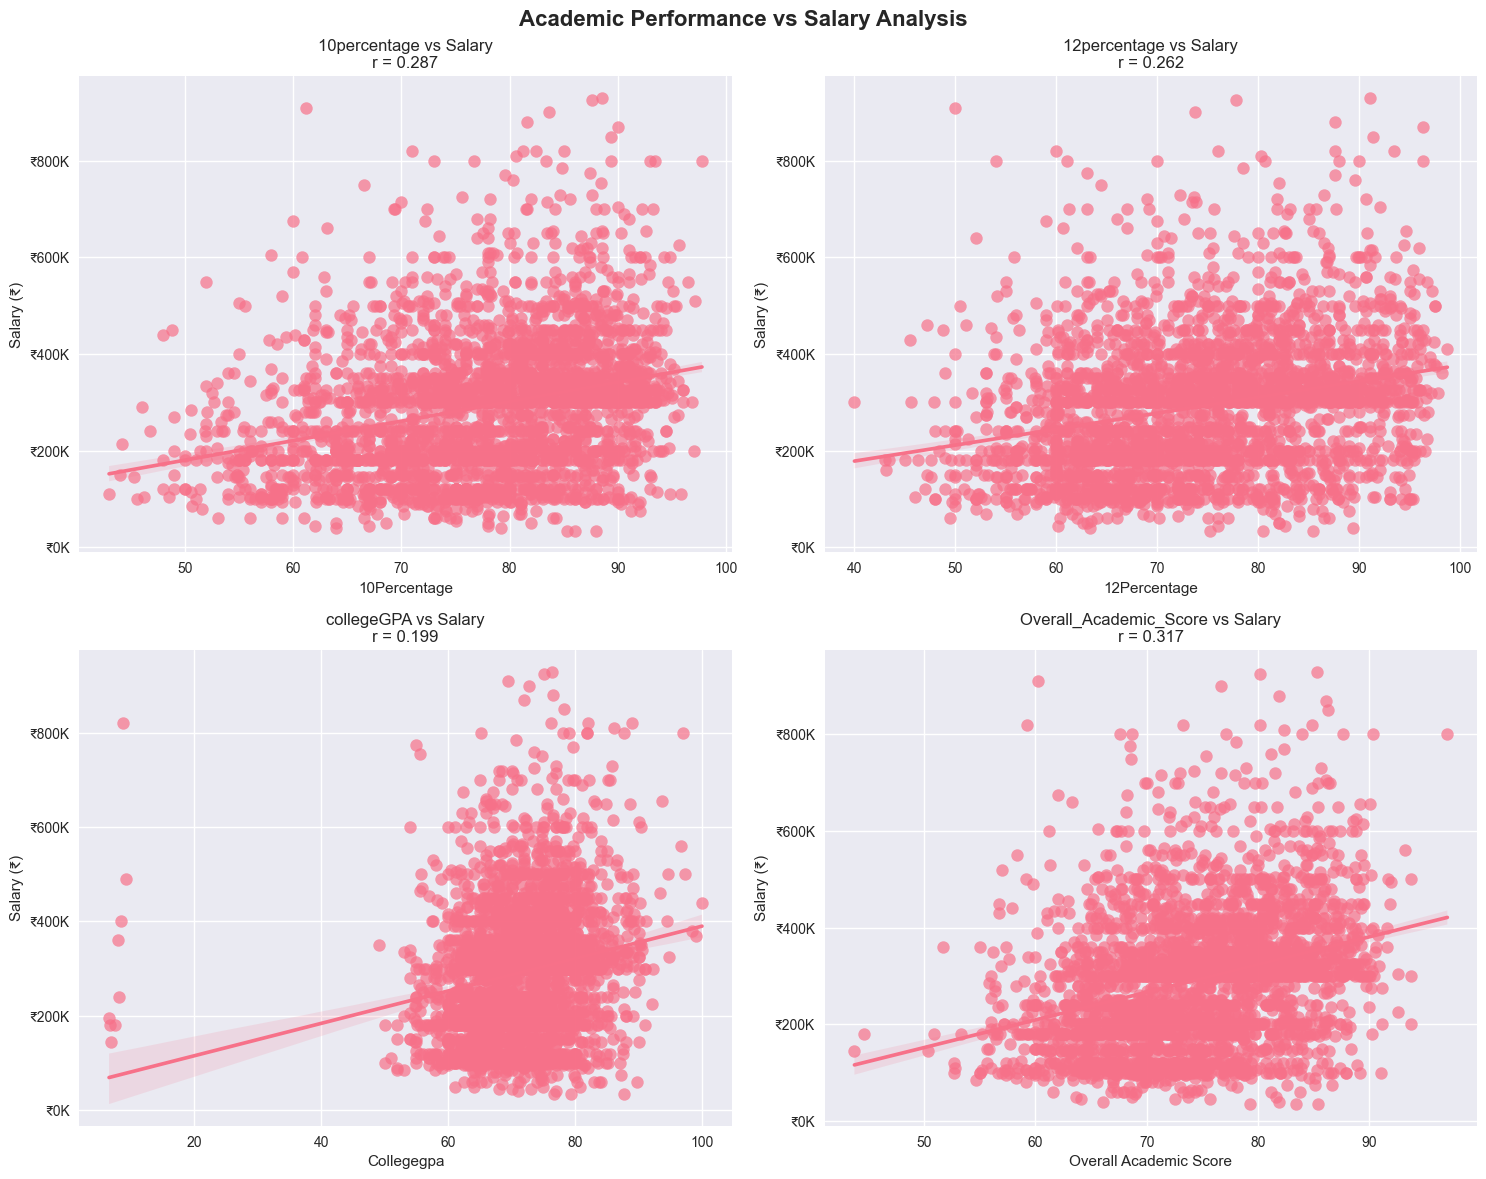

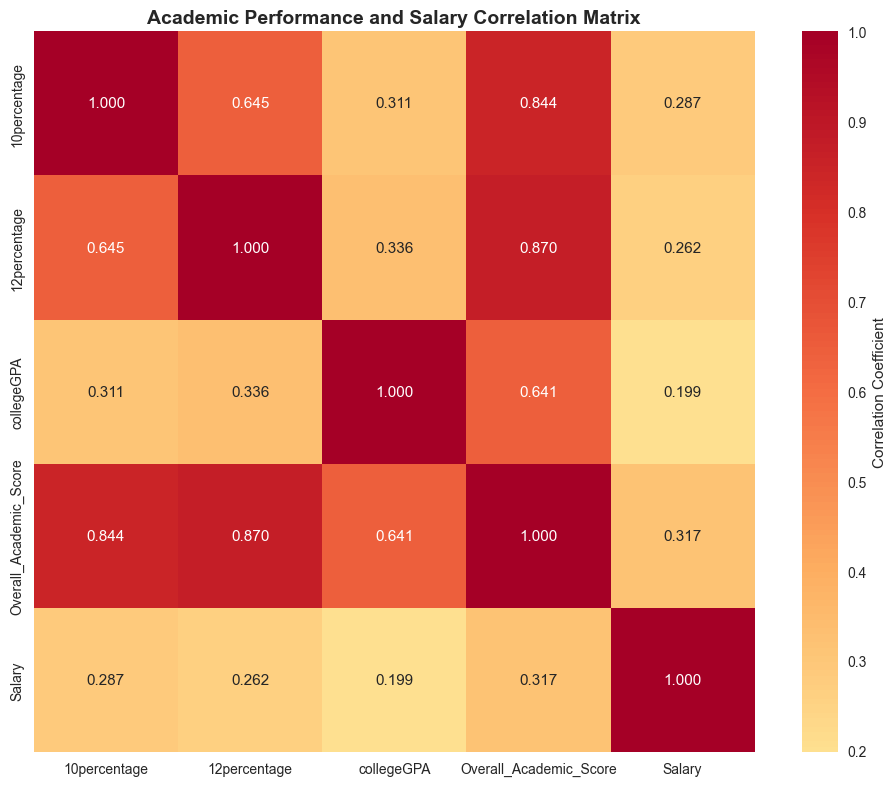

In [16]:
# ========================================================================================
# CELL 4: Analysis 1 - Academic Performance vs Salary Correlation
# ========================================================================================

# Correlation analysis between academic metrics and salary


print("=== ACADEMIC PERFORMANCE vs SALARY CORRELATION ===")


# Correlation analysis between academic metrics and salary
df['Overall_Academic_Score'] = (df['10percentage'] + df['12percentage'] + df['collegeGPA']) / 3
academic_cols = ['10percentage', '12percentage', 'collegeGPA', 'Overall_Academic_Score']

correlations = {}
for col in academic_cols:
    corr_pearson, p_value = pearsonr(df[col], df['Salary'])
    correlations[col] = {'correlation': corr_pearson, 'p_value': p_value}
    print(f"{col}: r = {corr_pearson:.3f}, p = {p_value:.3f}")

# Create correlation visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Academic Performance vs Salary Analysis', fontsize=16, fontweight='bold')

# Individual scatter plots
for i, col in enumerate(academic_cols):
    row, col_idx = i // 2, i % 2
    ax = axes[row, col_idx]
    
    # Scatter plot with trend line
    sns.regplot(data=df, x=col, y='Salary', ax=ax, scatter_kws={'s': 80, 'alpha': 0.7})
    ax.set_title(f'{col} vs Salary\nr = {correlations[col]["correlation"]:.3f}')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Salary (₹)')
    
    # Format y-axis as currency
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Create correlation heatmap
academic_salary_data = df[academic_cols + ['Salary']]
plt.figure(figsize=(10, 8))
correlation_matrix = academic_salary_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Academic Performance and Salary Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

=== COLLEGE TIER AND CITY TIER IMPACT ON SALARY ===
Salary by College Tier:
                 mean    median       std  count
CollegeTier                                     
1            395320.0  350000.0  153983.0    219
2            284124.0  290000.0  136087.0   2753

Salary by City Tier:
                     mean    median       std  count
CollegeCityTier                                     
0                290934.0  300000.0  140176.0   2092
1                295608.0  300000.0  141273.0    880

T-test between Tier 1 and Tier 2 colleges: t = 11.520, p = 0.000


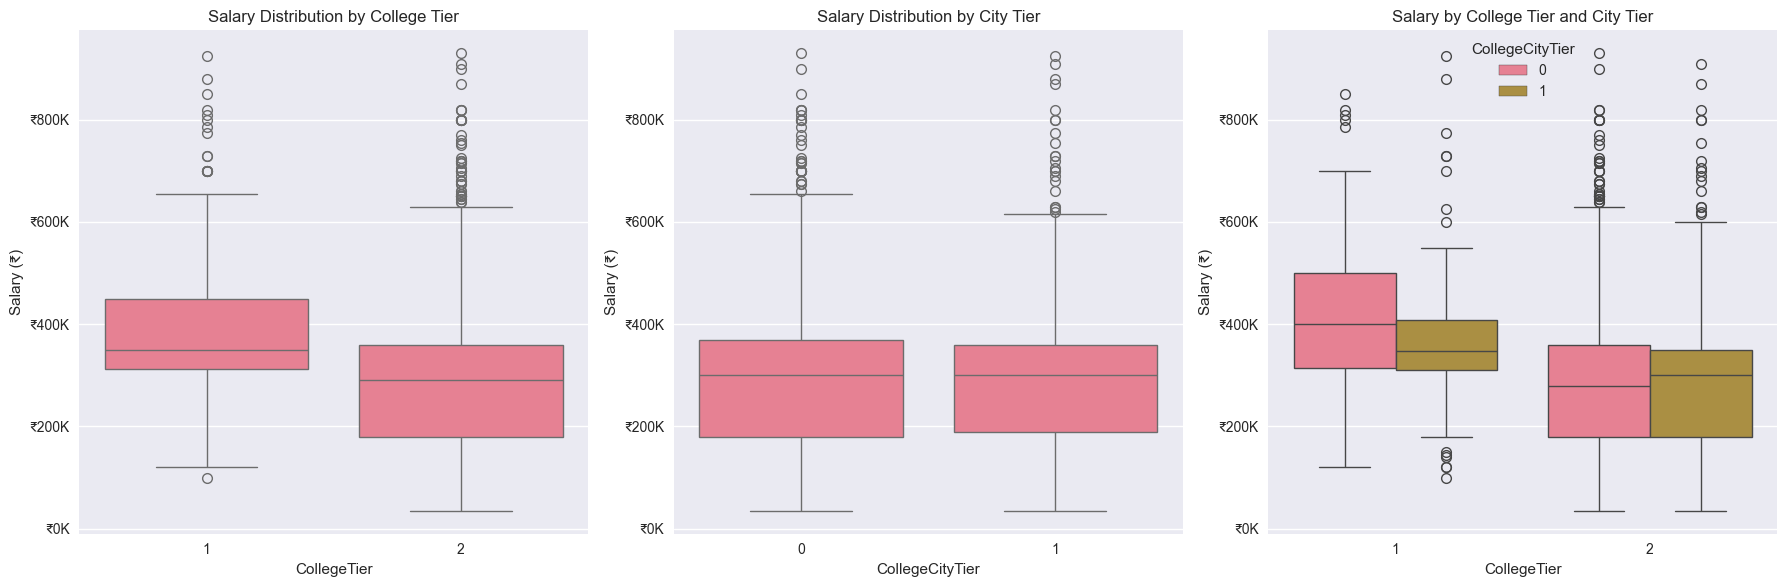

In [17]:
# ========================================================================================
# CELL 5: Analysis 2 - College Tier and City Tier Impact on Salary
# ========================================================================================

print("=== COLLEGE TIER AND CITY TIER IMPACT ON SALARY ===")

# Group by college tier
tier_analysis = df.groupby('CollegeTier')['Salary'].agg(['mean', 'median', 'std', 'count']).round(0)
print("Salary by College Tier:")
print(tier_analysis)

# Group by city tier
city_tier_analysis = df.groupby('CollegeCityTier')['Salary'].agg(['mean', 'median', 'std', 'count']).round(0)
print("\nSalary by City Tier:")
print(city_tier_analysis)

# Statistical significance test
tier1_salaries = df[df['CollegeTier'] == 1]['Salary']
tier2_salaries = df[df['CollegeTier'] == 2]['Salary']
t_stat, p_value = stats.ttest_ind(tier1_salaries, tier2_salaries)
print(f"\nT-test between Tier 1 and Tier 2 colleges: t = {t_stat:.3f}, p = {p_value:.3f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot by college tier
sns.boxplot(data=df, x='CollegeTier', y='Salary', ax=axes[0])
axes[0].set_title('Salary Distribution by College Tier')
axes[0].set_ylabel('Salary (₹)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Box plot by city tier
sns.boxplot(data=df, x='CollegeCityTier', y='Salary', ax=axes[1])
axes[1].set_title('Salary Distribution by City Tier')
axes[1].set_ylabel('Salary (₹)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Combined analysis
sns.boxplot(data=df, x='CollegeTier', y='Salary', hue='CollegeCityTier', ax=axes[2])
axes[2].set_title('Salary by College Tier and City Tier')
axes[2].set_ylabel('Salary (₹)')
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

=== SPECIALIZATION IMPACT ON SALARY ===
Salary by Specialization (sorted by mean salary):
                                                 mean    median       std  \
Specialization                                                              
computer networking                          565000.0  565000.0       NaN   
information science                          460000.0  460000.0       NaN   
information & communication technology       450000.0  450000.0       NaN   
chemical engineering                         415000.0  380000.0  229764.0   
industrial & production engineering          412500.0  440000.0  177341.0   
industrial engineering                       370000.0  370000.0   28284.0   
instrumentation and control engineering      357647.0  320000.0  141941.0   
computer engineering                         354156.0  350000.0  161264.0   
telecommunication engineering                351250.0  365000.0   54829.0   
civil engineering                            347333.0  300000.0

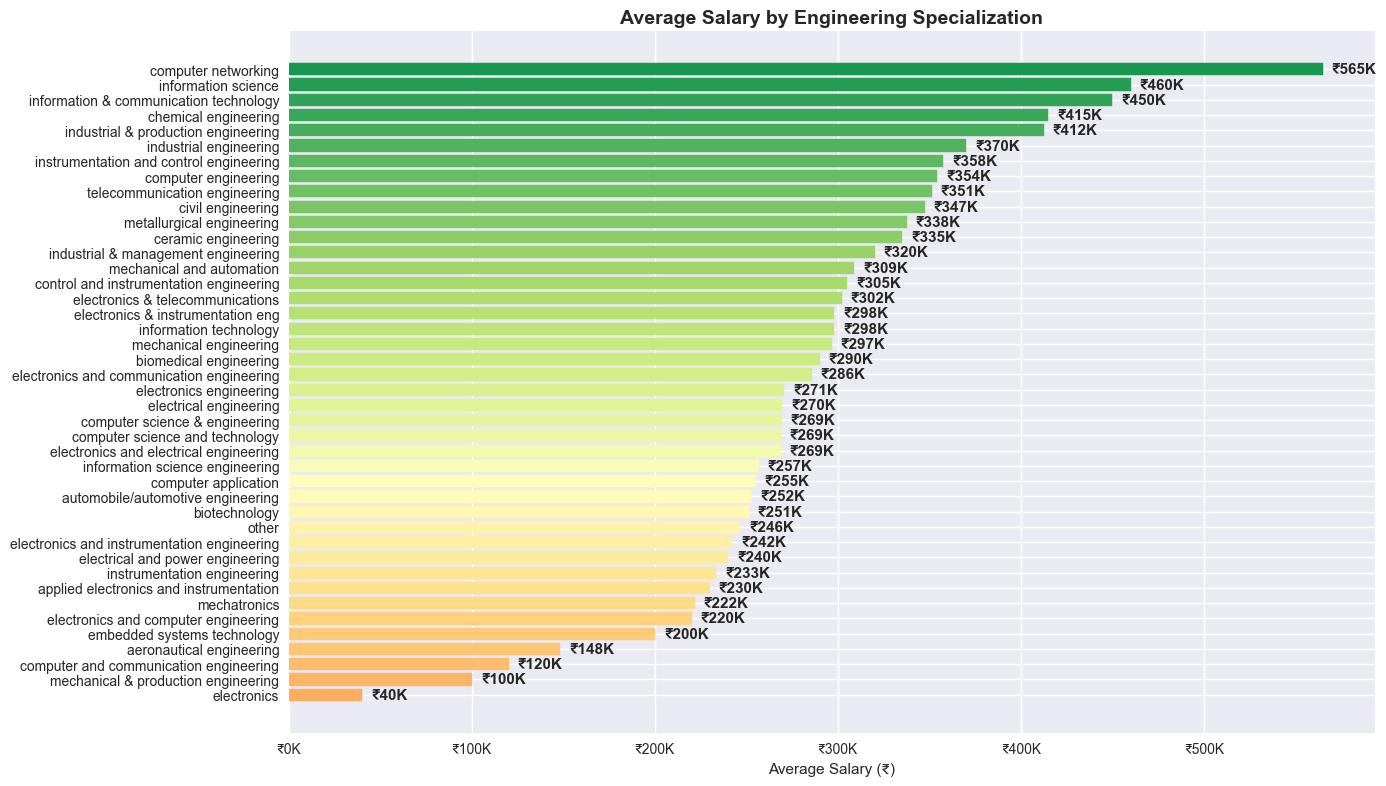


Salary by Degree Type:
                   mean    median  count
Degree                                  
B.Tech/B.E.    294638.0  300000.0   2734
M.Sc. (Tech.)  460000.0  460000.0      1
M.Tech./M.E.   313205.0  300000.0     39
MCA            255328.0  210000.0    198


In [18]:

# ========================================================================================
# CELL 6: Analysis 3 - Specialization Impact on Salary
# ========================================================================================

print("=== SPECIALIZATION IMPACT ON SALARY ===")

# Salary by specialization
spec_analysis = df.groupby('Specialization')['Salary'].agg(['mean', 'median', 'std', 'count']).round(0)
spec_analysis_sorted = spec_analysis.sort_values('mean', ascending=False)
print("Salary by Specialization (sorted by mean salary):")
print(spec_analysis_sorted)

# Visualization
plt.figure(figsize=(14, 8))
specializations = df['Specialization'].value_counts().index

# Create bar plot
salary_by_spec = df.groupby('Specialization')['Salary'].mean().sort_values(ascending=True)
bars = plt.barh(range(len(salary_by_spec)), salary_by_spec.values)

# Color bars based on salary level
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(salary_by_spec)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.yticks(range(len(salary_by_spec)), salary_by_spec.index)
plt.xlabel('Average Salary (₹)')
plt.title('Average Salary by Engineering Specialization', fontsize=14, fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Add value labels on bars
for i, v in enumerate(salary_by_spec.values):
    plt.text(v + 5000, i, f'₹{v/1000:.0f}K', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Degree type analysis
degree_analysis = df.groupby('Degree')['Salary'].agg(['mean', 'median', 'count']).round(0)
print("\nSalary by Degree Type:")
print(degree_analysis)


=== TEST SCORES IMPACT ON SALARY ===
Correlation between test scores and salary:
English: r = 0.260, p = 0.000
Logical: r = 0.256, p = 0.000
Quant: r = 0.364, p = 0.000
Domain: r = 0.180, p = 0.000
Aptitude_Score: r = 0.377, p = 0.000


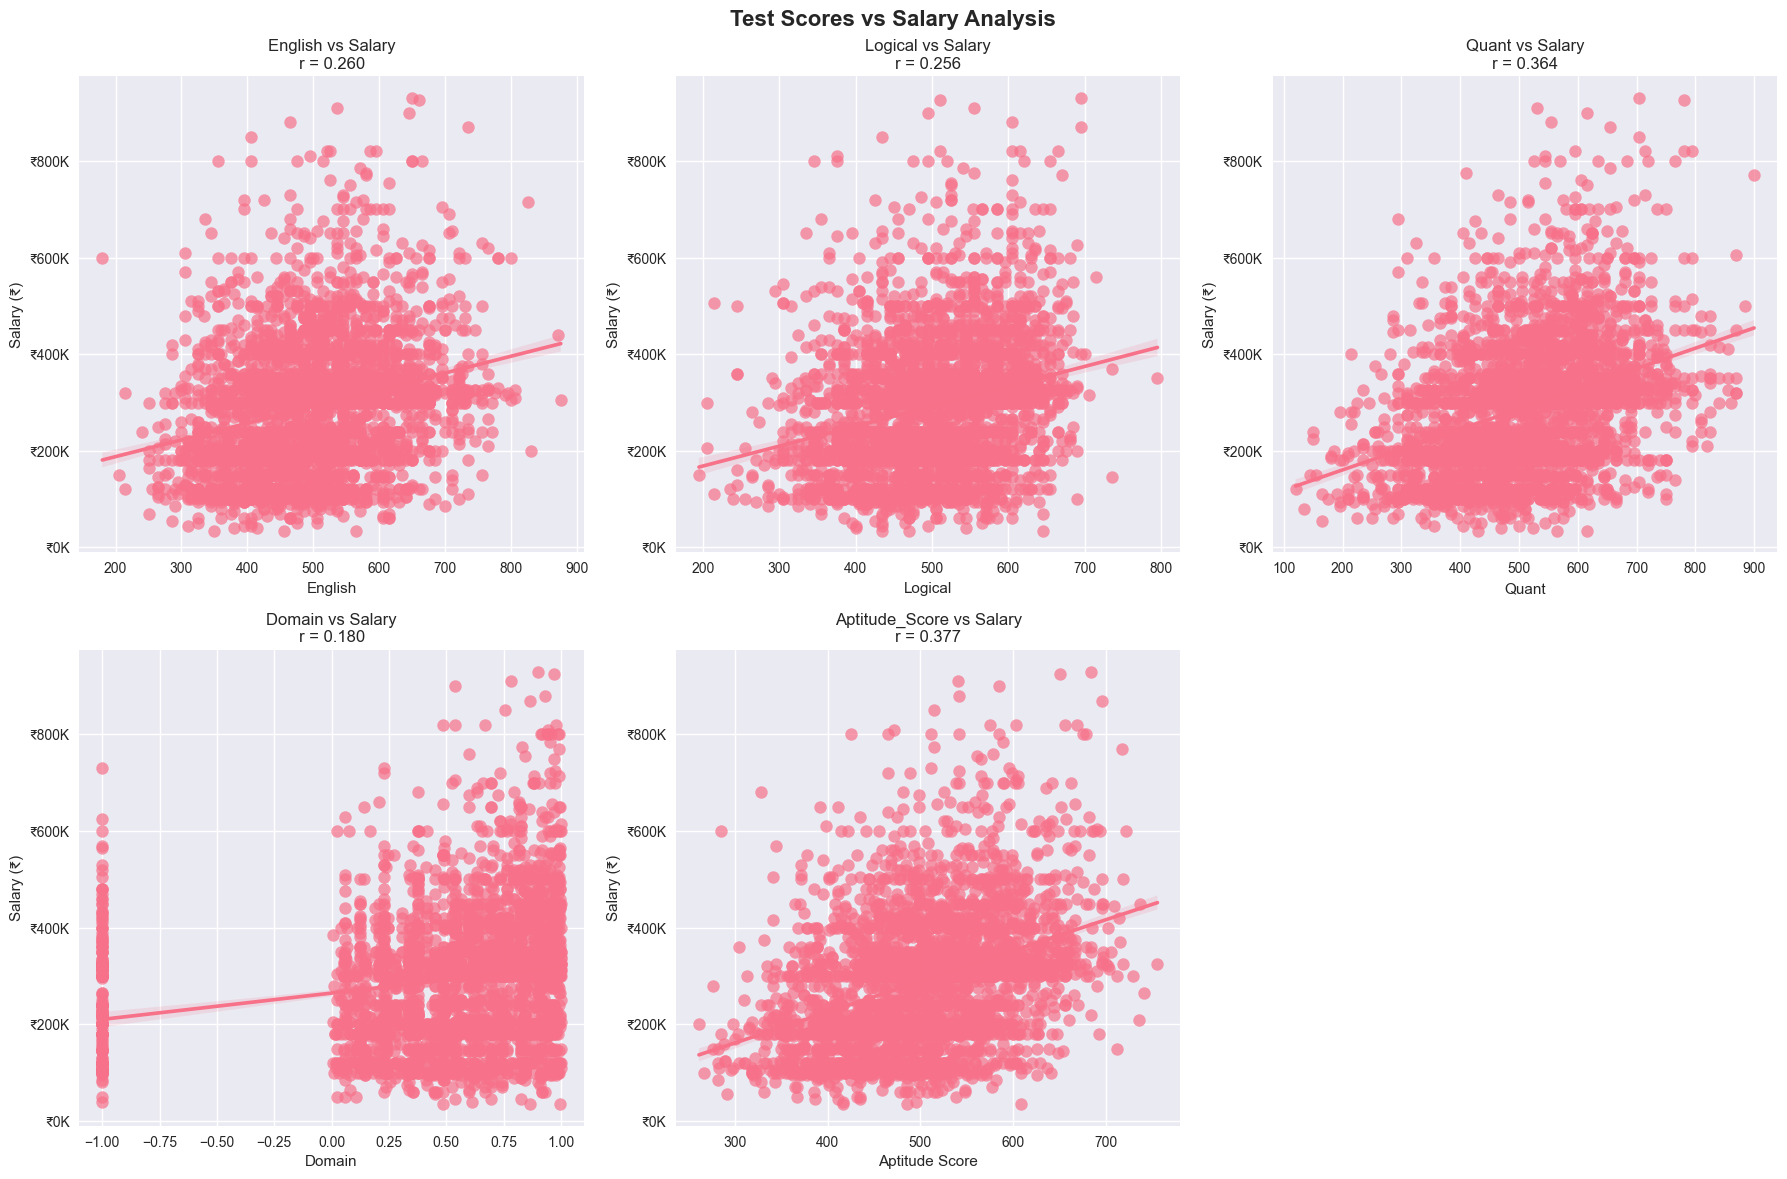


Salary by Test Score Levels:

English_Level:
                   mean  count
English_Level                 
Low            241011.0    618
Medium         298044.0   2069
High           362000.0    285

Logical_Level:
                   mean  count
Logical_Level                 
Low            243926.0    391
Medium         286998.0   2182
High           368835.0    399

Quant_Level:
                 mean  count
Quant_Level                 
Low          211825.0    416
Medium       292936.0   2132
High         368184.0    424


In [19]:
# ========================================================================================
# CELL 7: Analysis 4 - Test Scores Impact on Salary
# ========================================================================================

print("=== TEST SCORES IMPACT ON SALARY ===")

# Correlation analysis for test scores
df['Aptitude_Score'] = (df['English'] + df['Logical'] + df['Quant']) / 3
test_cols = ['English', 'Logical', 'Quant', 'Domain', 'Aptitude_Score']

print("Correlation between test scores and salary:")
test_correlations = {}
for col in test_cols:
    corr, p_val = pearsonr(df[col], df['Salary'])
    test_correlations[col] = {'correlation': corr, 'p_value': p_val}
    print(f"{col}: r = {corr:.3f}, p = {p_val:.3f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Test Scores vs Salary Analysis', fontsize=16, fontweight='bold')

for i, col in enumerate(test_cols):
    row, col_idx = i // 3, i % 3
    ax = axes[row, col_idx]
    
    sns.regplot(data=df, x=col, y='Salary', ax=ax, scatter_kws={'s': 80, 'alpha': 0.7})
    ax.set_title(f'{col} vs Salary\nr = {test_correlations[col]["correlation"]:.3f}')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Salary (₹)')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Create performance categories for better analysis
df['English_Level'] = pd.cut(df['English'], bins=3, labels=['Low', 'Medium', 'High'])
df['Logical_Level'] = pd.cut(df['Logical'], bins=3, labels=['Low', 'Medium', 'High'])
df['Quant_Level'] = pd.cut(df['Quant'], bins=3, labels=['Low', 'Medium', 'High'])

# Salary by performance levels
print("\nSalary by Test Score Levels:")
for col in ['English_Level', 'Logical_Level', 'Quant_Level']:
    level_analysis = df.groupby(col)['Salary'].agg(['mean', 'count']).round(0)
    print(f"\n{col}:")
    print(level_analysis)

In [20]:
# ========================================================================================
# CELL 8: Analysis 5 - Technical Skills Impact
# ========================================================================================

print("=== TECHNICAL SKILLS IMPACT ON SALARY ===")

# Analyze technical domain scores (excluding NaN values)
technical_skills = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                   'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Check which students have scores in which domains
print("Technical Skills Assessment:")
for skill in technical_skills:
    valid_scores = df[skill].dropna()
    if len(valid_scores) > 0:
        corr_with_salary = valid_scores.corr(df.loc[valid_scores.index, 'Salary'])
        print(f"{skill}: {len(valid_scores)} students tested, correlation with salary: {corr_with_salary:.3f}")
        
        # Show salary stats for students with this skill
        salary_stats = df.loc[valid_scores.index, 'Salary'].describe()
        print(f"  Salary range: ₹{salary_stats['min']:,.0f} - ₹{salary_stats['max']:,.0f}")
        print(f"  Average salary: ₹{salary_stats['mean']:,.0f}")
    else:
        print(f"{skill}: No students tested")

# Programming skills analysis
programming_students = df[df['ComputerProgramming'].notna()]
non_programming_students = df[df['ComputerProgramming'].isna()]

if len(programming_students) > 0 and len(non_programming_students) > 0:
    print(f"\nProgramming Skills Impact:")
    print(f"Students with programming scores: {len(programming_students)}")
    print(f"Average salary with programming: ₹{programming_students['Salary'].mean():,.0f}")
    print(f"Students without programming scores: {len(non_programming_students)}")
    print(f"Average salary without programming: ₹{non_programming_students['Salary'].mean():,.0f}")


=== TECHNICAL SKILLS IMPACT ON SALARY ===
Technical Skills Assessment:
ComputerProgramming: 2972 students tested, correlation with salary: 0.167
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
ElectronicsAndSemicon: 2972 students tested, correlation with salary: 0.010
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
ComputerScience: 2972 students tested, correlation with salary: -0.138
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
MechanicalEngg: 2972 students tested, correlation with salary: 0.032
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
ElectricalEngg: 2972 students tested, correlation with salary: -0.044
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
TelecomEngg: 2972 students tested, correlation with salary: -0.016
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318
CivilEngg: 2972 students tested, correlation with salary: 0.055
  Salary range: ₹35,000 - ₹930,000
  Average salary: ₹292,318


=== PERSONALITY TRAITS IMPACT ON SALARY ===
Correlation between personality traits and salary:
conscientiousness: r = -0.045, p = 0.015
agreeableness: r = 0.078, p = 0.000
extraversion: r = -0.013, p = 0.471
nueroticism: r = -0.072, p = 0.000
openess_to_experience: r = 0.005, p = 0.793


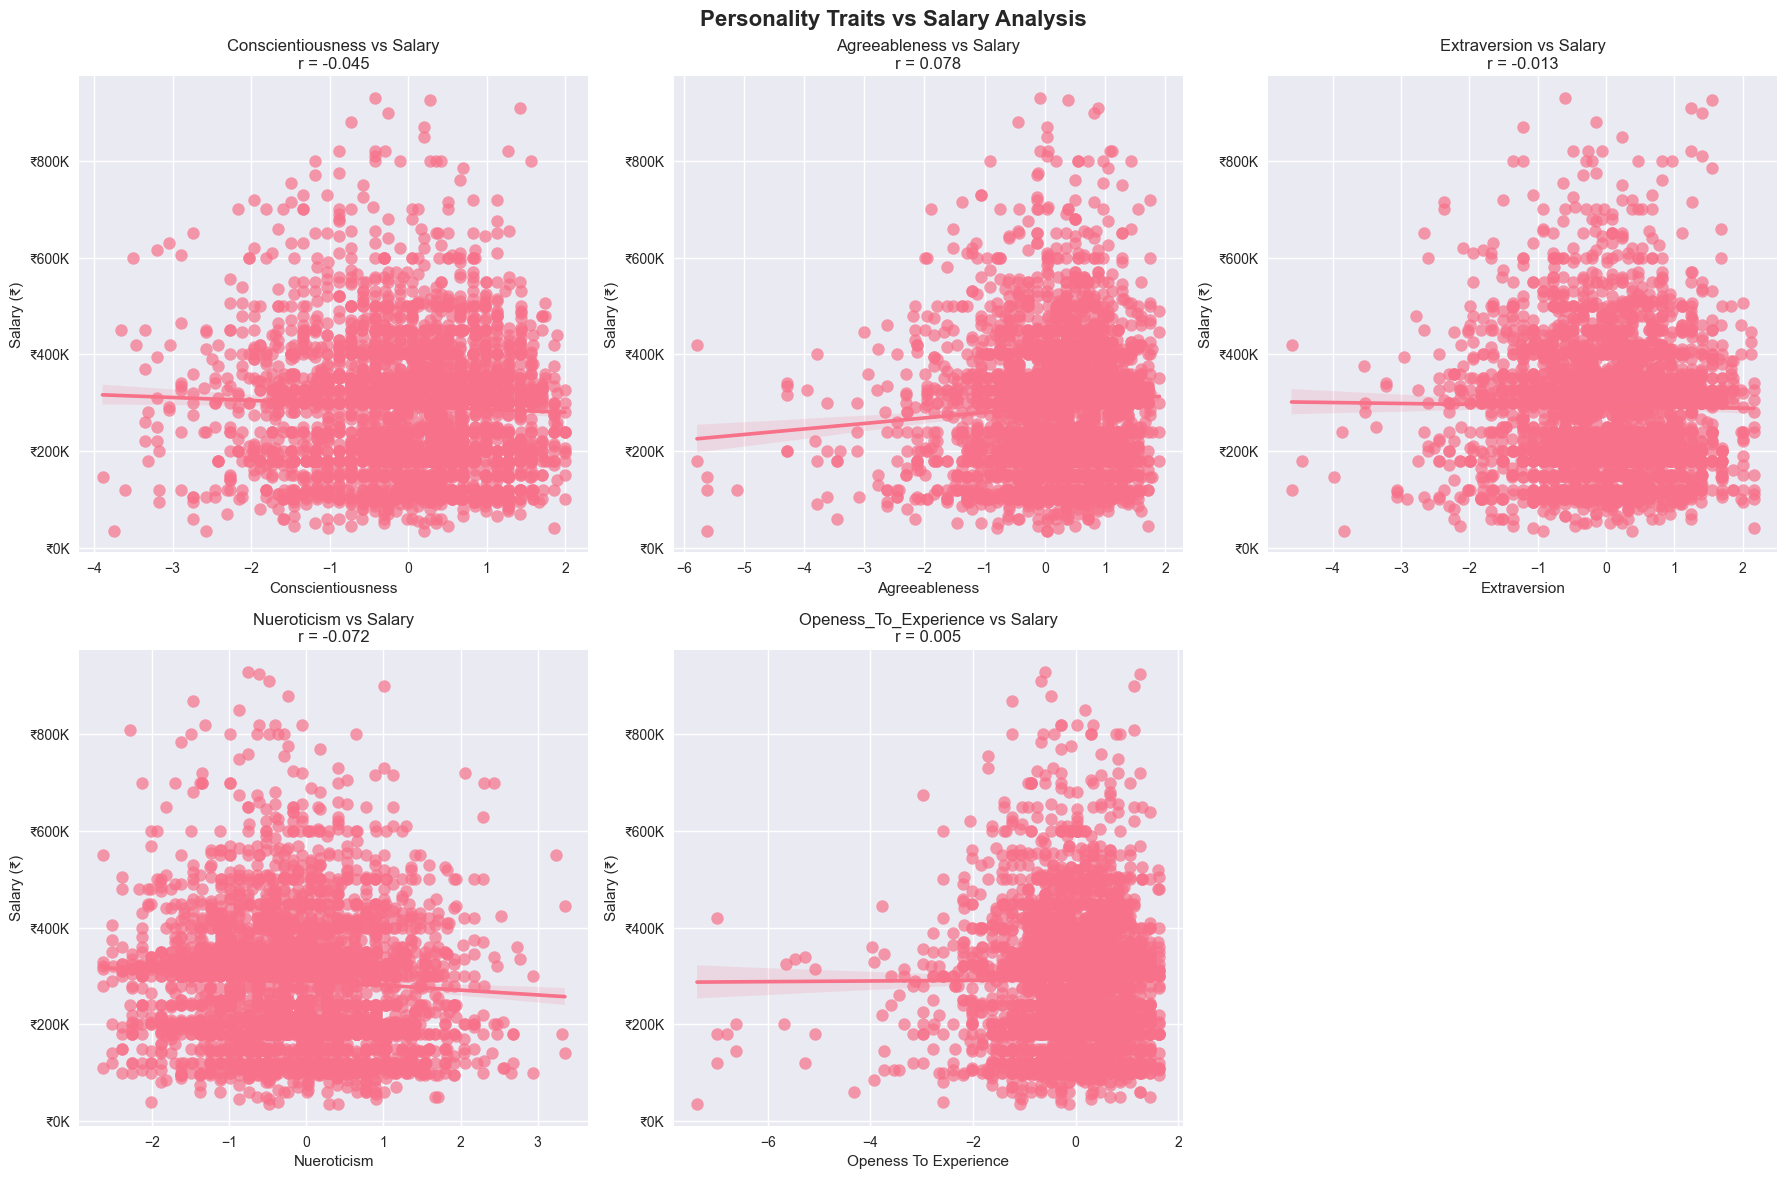


Conscientiousness Level Impact on Salary:
                             mean    median  count
conscientiousness_level                           
Low                      304659.0  300000.0    132
Medium                   295333.0  300000.0   1337
High                     288552.0  300000.0   1503


In [21]:
# ========================================================================================
# CELL 9: Analysis 6 - Personality Traits Impact on Salary
# ========================================================================================

print("=== PERSONALITY TRAITS IMPACT ON SALARY ===")

# Big Five personality traits analysis
personality_traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

print("Correlation between personality traits and salary:")
personality_correlations = {}
for trait in personality_traits:
    corr, p_val = pearsonr(df[trait], df['Salary'])
    personality_correlations[trait] = {'correlation': corr, 'p_value': p_val}
    print(f"{trait}: r = {corr:.3f}, p = {p_val:.3f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Personality Traits vs Salary Analysis', fontsize=16, fontweight='bold')

for i, trait in enumerate(personality_traits):
    row, col_idx = i // 3, i % 3
    ax = axes[row, col_idx]
    
    sns.regplot(data=df, x=trait, y='Salary', ax=ax, scatter_kws={'s': 80, 'alpha': 0.7})
    ax.set_title(f'{trait.title()} vs Salary\nr = {personality_correlations[trait]["correlation"]:.3f}')
    ax.set_xlabel(trait.replace('_', ' ').title())
    ax.set_ylabel('Salary (₹)')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Create personality categories for better interpretation
for trait in personality_traits:
    df[f'{trait}_level'] = pd.cut(df[trait], bins=3, labels=['Low', 'Medium', 'High'])

# Most important personality trait analysis (conscientiousness)
print("\nConscientiousness Level Impact on Salary:")
conscientiousness_analysis = df.groupby('conscientiousness_level')['Salary'].agg(['mean', 'median', 'count']).round(0)
print(conscientiousness_analysis)


=== GRADUATION YEAR AND EXPERIENCE IMPACT ===
Salary by Graduation Year:
                    mean    median  count
GraduationYear                           
2007            120000.0  120000.0      1
2009            310312.0  227500.0     16
2010            365693.0  372500.0    202
2011            347653.0  350000.0    377
2012            309255.0  310000.0    638
2013            270951.0  275000.0    882
2014            260835.0  265000.0    784
2015            248607.0  240000.0     61
2016            335000.0  337500.0      4
2017            209286.0  180000.0      7

Salary by Years Since Graduation:
                            mean    median  count
Years_Since_Graduation                           
-3                      209286.0  180000.0      7
-2                      335000.0  337500.0      4
-1                      248607.0  240000.0     61
 0                      260835.0  265000.0    784
 1                      270951.0  275000.0    882
 2                      309255.0  3100

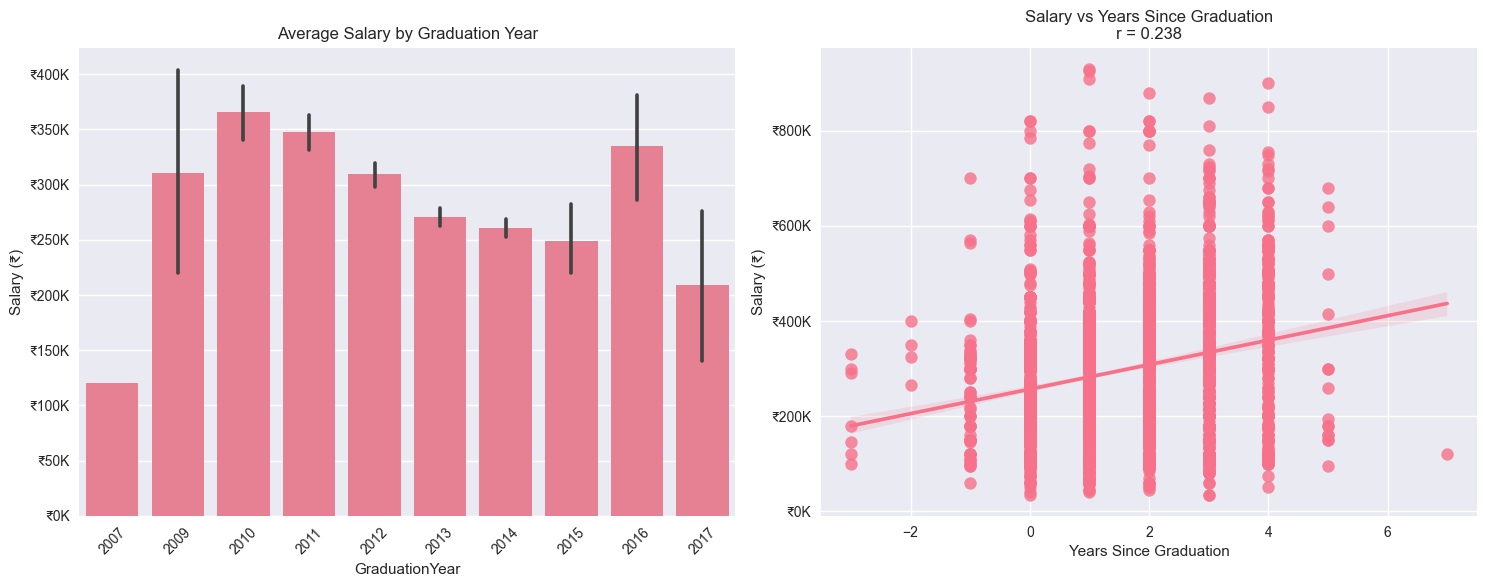

In [22]:
# ========================================================================================
# CELL 10: Analysis 7 - Graduation Year and Experience Impact
# ========================================================================================

print("=== GRADUATION YEAR AND EXPERIENCE IMPACT ===")

# Fix the single graduation year = 0 record (mechanical engineering student)
df.loc[df['GraduationYear'] == 0, 'GraduationYear'] = 2014

# Recalculate Years_Since_Graduation 
df['Years_Since_Graduation'] = 2014 - df['GraduationYear']

# Salary trends by graduation year
grad_year_analysis = df.groupby('GraduationYear')['Salary'].agg(['mean', 'median', 'count']).round(0)
print("Salary by Graduation Year:")
print(grad_year_analysis)

# Years since graduation impact
experience_analysis = df.groupby('Years_Since_Graduation')['Salary'].agg(['mean', 'median', 'count']).round(0)
print("\nSalary by Years Since Graduation:")
print(experience_analysis)

# Correlation with years since graduation
exp_corr, exp_p = pearsonr(df['Years_Since_Graduation'], df['Salary'])
print(f"\nCorrelation between years since graduation and salary: r = {exp_corr:.3f}, p = {exp_p:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Salary by graduation year
sns.barplot(data=df, x='GraduationYear', y='Salary', ax=axes[0])
axes[0].set_title('Average Salary by Graduation Year')
axes[0].set_ylabel('Salary (₹)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))
axes[0].tick_params(axis='x', rotation=45)

# Salary vs years since graduation
sns.regplot(data=df, x='Years_Since_Graduation', y='Salary', ax=axes[1], scatter_kws={'s': 80})
axes[1].set_title(f'Salary vs Years Since Graduation\nr = {exp_corr:.3f}')
axes[1].set_xlabel('Years Since Graduation')
axes[1].set_ylabel('Salary (₹)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

=== COMPREHENSIVE FEATURE IMPORTANCE ANALYSIS ===
Feature Importance (sorted by absolute correlation with salary):
Aptitude_Score            | r =  0.377 | p =  0.000 ***
Quant                     | r =  0.364 | p =  0.000 ***
Overall_Academic_Score    | r =  0.317 | p =  0.000 ***
10percentage              | r =  0.287 | p =  0.000 ***
12percentage              | r =  0.262 | p =  0.000 ***
English                   | r =  0.260 | p =  0.000 ***
Logical                   | r =  0.256 | p =  0.000 ***
Years_Since_Graduation    | r =  0.238 | p =  0.000 ***
collegeGPA                | r =  0.199 | p =  0.000 ***
Domain                    | r =  0.180 | p =  0.000 ***
agreeableness             | r =  0.078 | p =  0.000 ***
nueroticism               | r = -0.072 | p =  0.000 ***
conscientiousness         | r = -0.045 | p =  0.015 *
extraversion              | r = -0.013 | p =  0.471 
openess_to_experience     | r =  0.005 | p =  0.793 


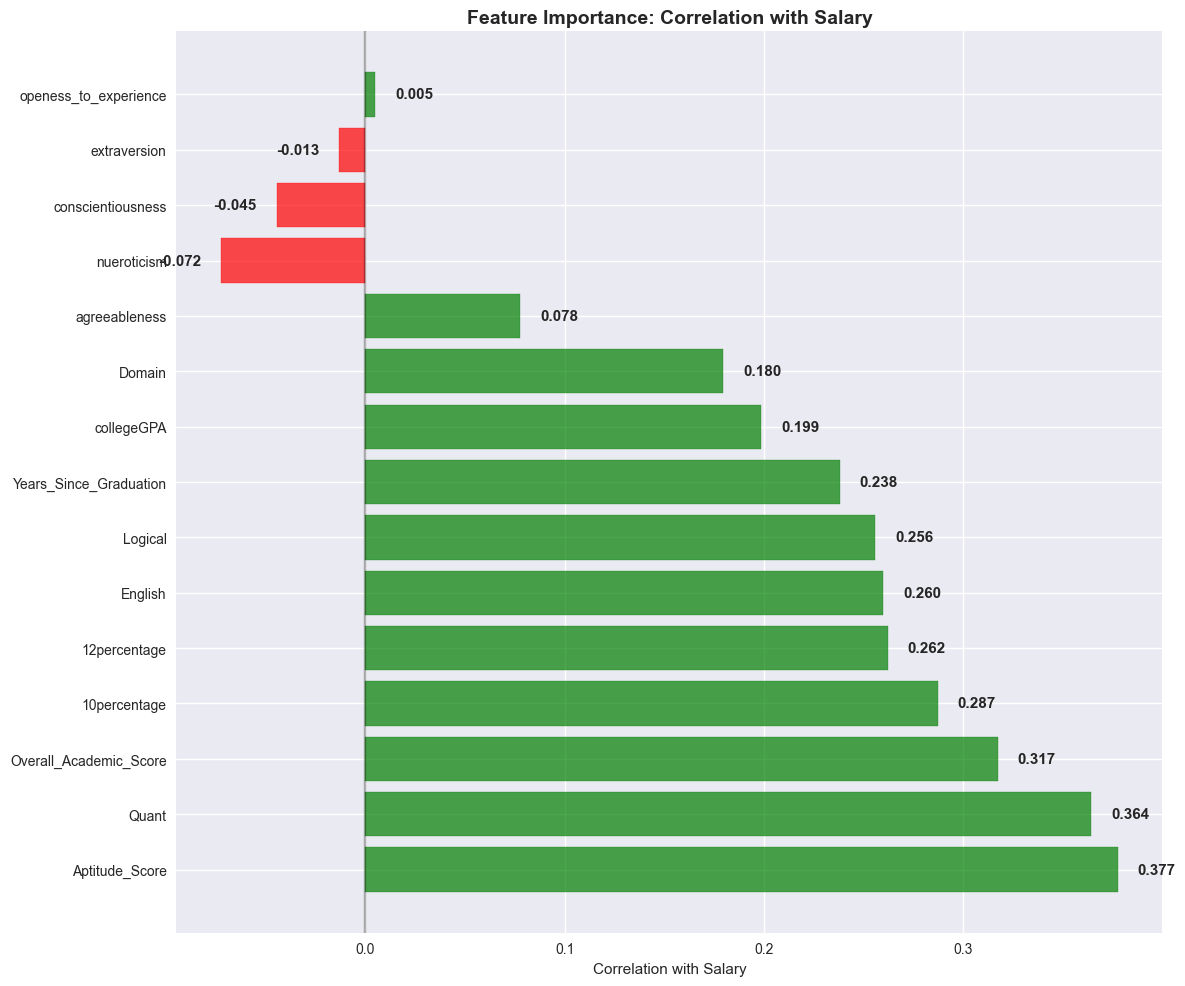

In [23]:
# ========================================================================================
# CELL 11: Comprehensive Feature Importance Analysis
# ========================================================================================

print("=== COMPREHENSIVE FEATURE IMPORTANCE ANALYSIS ===")

# Calculate correlations for all numeric features with salary
numeric_features = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 
                   'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 
                   'openess_to_experience', 'Years_Since_Graduation', 'Overall_Academic_Score', 
                   'Aptitude_Score']

all_correlations = {}
for feature in numeric_features:
    corr, p_val = pearsonr(df[feature], df['Salary'])
    all_correlations[feature] = {'correlation': abs(corr), 'original_corr': corr, 'p_value': p_val}

# Sort by absolute correlation
sorted_features = sorted(all_correlations.items(), key=lambda x: x[1]['correlation'], reverse=True)

print("Feature Importance (sorted by absolute correlation with salary):")
print("=" * 70)
for feature, stats in sorted_features:
    significance = "***" if stats['p_value'] < 0.001 else "**" if stats['p_value'] < 0.01 else "*" if stats['p_value'] < 0.05 else ""
    print(f"{feature:25} | r = {stats['original_corr']:6.3f} | p = {stats['p_value']:6.3f} {significance}")

# Visualization of feature importance
plt.figure(figsize=(12, 10))
features = [item[0] for item in sorted_features]
correlations = [item[1]['original_corr'] for item in sorted_features]

bars = plt.barh(range(len(features)), correlations)

# Color bars based on correlation strength and direction
colors = ['red' if corr < 0 else 'green' for corr in correlations]
for bar, color in zip(bars, colors):
    bar.set_color(color)
    bar.set_alpha(0.7)

plt.yticks(range(len(features)), features)
plt.xlabel('Correlation with Salary')
plt.title('Feature Importance: Correlation with Salary', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values on bars
for i, corr in enumerate(correlations):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

---
# MODEL TRAINING


In [24]:
# ========================================================================================
# CELL 14: Pipeline Setup and Data Preparation (FIXED FOR PICKLING)
# ========================================================================================
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("=== PIPELINE SETUP AND DATA PREPARATION ===")

# Create a copy of data for ML processing
ml_data = df.copy()

# Identify column types for pipeline processing
numeric_features = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
                   'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

technical_features = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                     'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

categorical_features = ['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

ordinal_features = ['CollegeTier', 'CollegeCityTier', 'GraduationYear']

print(f"Numeric features: {len(numeric_features)} columns")
print(f"Technical features: {len(technical_features)} columns") 
print(f"Categorical features: {len(categorical_features)} columns")
print(f"Ordinal features: {len(ordinal_features)} columns")

# Target variable
target = 'Salary'

=== PIPELINE SETUP AND DATA PREPARATION ===
Numeric features: 12 columns
Technical features: 7 columns
Categorical features: 6 columns
Ordinal features: 3 columns


In [25]:
# ========================================================================================
# CELL 15: Custom Preprocessing Transformers (MOVED TO GLOBAL SCOPE)
# ========================================================================================
print("\n=== CUSTOM PREPROCESSING TRANSFORMERS ===")

class DataCleaner(BaseEstimator, TransformerMixin):
    """Custom transformer for data cleaning tasks"""
    
    def __init__(self):
        self.graduation_year_mode_ = None
        
    def fit(self, X, y=None):
        # Find mode for graduation year (excluding 0)
        grad_years = X['GraduationYear'][X['GraduationYear'] != 0]
        self.graduation_year_mode_ = grad_years.mode()[0] if len(grad_years) > 0 else 2014
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        # Fix graduation year = 0 issue
        X_transformed.loc[X_transformed['GraduationYear'] == 0, 'GraduationYear'] = self.graduation_year_mode_
        
        # Handle technical skills (-1 to 0)
        technical_cols = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                         'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
        
        for col in technical_cols:
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].replace(-1, 0)
        
        return X_transformed

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Custom transformer for feature engineering"""
    
    def __init__(self, reference_year=2014):
        self.reference_year = reference_year
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        # Create composite academic features
        X_transformed['Academic_Performance_Score'] = (
            X_transformed['10percentage'] + 
            X_transformed['12percentage'] + 
            X_transformed['collegeGPA']
        ) / 3
        
        # Create composite test score features
        X_transformed['Aptitude_Total_Score'] = (
            X_transformed['English'] + 
            X_transformed['Logical'] + 
            X_transformed['Quant']
        )
        
        # Technical skills count
        technical_cols = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                         'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
        available_tech_cols = [col for col in technical_cols if col in X_transformed.columns]
        X_transformed['Technical_Skills_Count'] = (X_transformed[available_tech_cols] > 0).sum(axis=1)
        
        # Personality composite scores
        X_transformed['Positive_Personality'] = (
            X_transformed['conscientiousness'] + 
            X_transformed['agreeableness'] + 
            X_transformed['extraversion'] + 
            X_transformed['openess_to_experience']
        )
        X_transformed['Emotional_Stability'] = -X_transformed['nueroticism']
        
        # Experience feature
        X_transformed['Years_Since_Graduation'] = self.reference_year - X_transformed['GraduationYear']
        
        return X_transformed

class BoardClassifier(BaseEstimator, TransformerMixin):
    """Custom transformer for board classification"""
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def classify_board(self, board_name):
        """Classify education boards into meaningful groups"""
        if pd.isna(board_name) or str(board_name).lower() == 'unknown':
            return 'Unknown'
        s = str(board_name).lower()
        
        if 'cbse' in s:
            return 'CBSE'
        if 'icse' in s or 'isc' in s:
            return 'ICSE'
        if any(keyword in s for keyword in ['state board', 'ssc', 'sslc', 'matric', 'stateboard']):
            return 'State Board'
        if 'rbse' in s or 'rajasthan' in s:
            return 'RBSE'
        if 'up board' in s or 'uttar pradesh' in s:
            return 'UP Board'
        if 'mp board' in s or 'mpbse' in s:
            return 'MP Board'
        if 'wbbse' in s or 'west bengal' in s:
            return 'WB Board'
        if 'kseeb' in s or 'karnataka' in s:
            return 'Karnataka Board'
        if 'tamil' in s or 'tn state board' in s:
            return 'TN Board'
        if 'gujarat' in s:
            return 'Gujarat Board'
        if 'bseb' in s or 'bihar' in s:
            return 'Bihar Board'
        if 'andhra' in s or 'apssc' in s:
            return 'AP Board'
        if 'kerala' in s:
            return 'Kerala Board'
        if 'maharashtra' in s:
            return 'Maharashtra Board'
        return 'Other'
    
    def transform(self, X):
        X_transformed = X.copy()
        
        # Apply board classification
        if '10board' in X_transformed.columns:
            X_transformed['10board_group'] = X_transformed['10board'].apply(self.classify_board)
        if '12board' in X_transformed.columns:
            X_transformed['12board_group'] = X_transformed['12board'].apply(self.classify_board)
        
        return X_transformed

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Custom transformer for categorical encoding"""
    
    def __init__(self):
        self.encoders_ = {}
        self.categorical_features = ['Gender', '10board_group', '12board_group', 'Degree', 'Specialization', 'CollegeState']
        
    def fit(self, X, y=None):
        for col in self.categorical_features:
            if col in X.columns:
                le = LabelEncoder()
                # Handle missing values by replacing with 'Unknown'
                X_col = X[col].fillna('Unknown').astype(str)
                le.fit(X_col)
                self.encoders_[col] = le
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        for col in self.categorical_features:
            if col in X_transformed.columns and col in self.encoders_:
                # Handle missing values and unseen categories
                X_col = X_transformed[col].fillna('Unknown').astype(str)
                le = self.encoders_[col]
                
                # Handle unseen categories
                mask = X_col.isin(le.classes_)
                X_col[~mask] = le.classes_[0]  # Replace unseen with first class
                
                X_transformed[col + '_encoded'] = le.transform(X_col)
                X_transformed = X_transformed.drop(columns=[col])
        return X_transformed

class FeatureSelector(BaseEstimator, TransformerMixin):
    """Custom transformer for feature selection and final preprocessing"""
    
    def __init__(self, include_scaling=False):
        self.include_scaling = include_scaling
        self.feature_names_ = None
        self.scaler_ = None
        
    def fit(self, X, y=None):
        # Define final feature set
        final_numeric_features = [
            '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
            'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
            'CollegeTier', 'CollegeCityTier', 'Years_Since_Graduation',
            'Academic_Performance_Score', 'Aptitude_Total_Score', 'Technical_Skills_Count',
            'Positive_Personality', 'Emotional_Stability'
        ]
        
        final_technical_features = [
            'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'
        ]
        
        final_categorical_features = [
            'Gender_encoded', '10board_group_encoded', '12board_group_encoded', 
            'Degree_encoded', 'Specialization_encoded', 'CollegeState_encoded'
        ]
        
        self.feature_names_ = (
            final_numeric_features + 
            final_technical_features + 
            final_categorical_features
        )
        
        # Prepare scaler if needed
        if self.include_scaling:
            available_features = [col for col in self.feature_names_ if col in X.columns]
            X_selected = X[available_features].fillna(0)
            self.scaler_ = StandardScaler()
            self.scaler_.fit(X_selected)
        
        return self
    
    def transform(self, X):
        # Select only the features we want and handle missing columns
        available_features = [col for col in self.feature_names_ if col in X.columns]
        X_selected = X[available_features].copy()
        
        # Fill any remaining missing values
        X_selected = X_selected.fillna(0)
        
        if self.include_scaling and self.scaler_ is not None:
            X_selected = pd.DataFrame(
                self.scaler_.transform(X_selected),
                columns=X_selected.columns,
                index=X_selected.index
            )
        
        return X_selected

# Global preprocessing pipeline function (simplified)
def create_preprocessing_pipeline(include_scaling=False):
    """Create preprocessing pipeline with optional scaling"""
    
    preprocessor_steps = [
        ('cleaner', DataCleaner()),
        ('board_classifier', BoardClassifier()),
        ('feature_engineer', FeatureEngineer()),
        ('categorical_encoder', CategoricalEncoder()),
        ('feature_selector', FeatureSelector(include_scaling=include_scaling))
    ]
    
    return Pipeline(preprocessor_steps)

print("Custom transformers and pipeline factory created!")


=== CUSTOM PREPROCESSING TRANSFORMERS ===
Custom transformers and pipeline factory created!


In [26]:
# ========================================================================================
# CELL 16: Data Splitting and Pipeline Testing
# ========================================================================================
print("\n=== DATA SPLITTING AND PIPELINE TESTING ===")

# Prepare data for modeling
X = ml_data.drop(columns=[target])
y = ml_data[target]

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Test preprocessing pipeline
test_pipeline = create_preprocessing_pipeline(include_scaling=False)
X_train_processed = test_pipeline.fit_transform(X_train)
X_test_processed = test_pipeline.transform(X_test)

print(f"Processed training set shape: {X_train_processed.shape}")
print(f"Processed testing set shape: {X_test_processed.shape}")
print(f"Feature names: {list(X_train_processed.columns)}")


=== DATA SPLITTING AND PIPELINE TESTING ===
Dataset shape: (2972, 44)
Target shape: (2972,)
Training set: (2080, 44)
Testing set: (892, 44)
Processed training set shape: (2080, 33)
Processed testing set shape: (892, 33)
Feature names: ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'CollegeTier', 'CollegeCityTier', 'Years_Since_Graduation', 'Academic_Performance_Score', 'Aptitude_Total_Score', 'Technical_Skills_Count', 'Positive_Personality', 'Emotional_Stability', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Gender_encoded', '10board_group_encoded', '12board_group_encoded', 'Degree_encoded', 'Specialization_encoded', 'CollegeState_encoded']


In [27]:
# ========================================================================================
# CELL 17: Linear Regression with Pipeline
# ========================================================================================
print("\n=== LINEAR REGRESSION WITH PIPELINE ===")

# Create Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor', LinearRegression())
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_pipeline.predict(X_train)
y_pred_lr_test = lr_pipeline.predict(X_test)

# Evaluate
train_r2_lr = r2_score(y_train, y_pred_lr_train)
test_r2_lr = r2_score(y_test, y_pred_lr_test)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)

print(f"Linear Regression Pipeline Results:")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Training RMSE: ₹{train_rmse_lr:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_lr:,.0f}")
print(f"Testing MAE: ₹{test_mae_lr:,.0f}")

# Store results
pipeline_results = {
    'Linear Regression': {
        'pipeline': lr_pipeline,
        'train_r2': train_r2_lr,
        'test_r2': test_r2_lr,
        'test_rmse': test_rmse_lr,
        'test_mae': test_mae_lr,
        'predictions': y_pred_lr_test
    }
}



=== LINEAR REGRESSION WITH PIPELINE ===
Linear Regression Pipeline Results:
Training R²: 0.3267
Testing R²: 0.2538
Training RMSE: ₹115,966
Testing RMSE: ₹119,581
Testing MAE: ₹91,673


In [28]:
# ========================================================================================
# CELL 18: Random Forest with Pipeline
# ========================================================================================
print("\n=== RANDOM FOREST WITH PIPELINE ===")

# Create Random Forest pipeline (no scaling needed)
rf_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_pipeline.predict(X_train)
y_pred_rf_test = rf_pipeline.predict(X_test)

# Evaluate
train_r2_rf = r2_score(y_train, y_pred_rf_train)
test_r2_rf = r2_score(y_test, y_pred_rf_test)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
test_mae_rf = mean_absolute_error(y_test, y_pred_rf_test)

print(f"Random Forest Pipeline Results:")
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Testing R²: {test_r2_rf:.4f}")
print(f"Training RMSE: ₹{train_rmse_rf:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_rf:,.0f}")
print(f"Testing MAE: ₹{test_mae_rf:,.0f}")

# Feature importance (extract from fitted pipeline)
rf_model = rf_pipeline.named_steps['regressor']
feature_names = list(X_train_processed.columns)
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Most Important Features (Random Forest):")
print(feature_importance_rf.head(10).to_string(index=False))

# Store results
pipeline_results['Random Forest'] = {
    'pipeline': rf_pipeline,
    'train_r2': train_r2_rf,
    'test_r2': test_r2_rf,
    'test_rmse': test_rmse_rf,
    'test_mae': test_mae_rf,
    'predictions': y_pred_rf_test,
    'feature_importance': feature_importance_rf
}



=== RANDOM FOREST WITH PIPELINE ===
Random Forest Pipeline Results:
Training R²: 0.7767
Testing R²: 0.2634
Training RMSE: ₹66,784
Testing RMSE: ₹118,812
Testing MAE: ₹90,216

Top 10 Most Important Features (Random Forest):
                   Feature  Importance
      Aptitude_Total_Score    0.120126
    Years_Since_Graduation    0.098589
Academic_Performance_Score    0.090968
                     Quant    0.075243
                collegeGPA    0.060536
       ComputerProgramming    0.054645
              10percentage    0.052524
              12percentage    0.040370
                    Domain    0.038137
                   English    0.035005


In [29]:
# ========================================================================================
# CELL 19: Gradient Boosting with Pipeline
# ========================================================================================
print("\n=== GRADIENT BOOSTING WITH PIPELINE ===")

# Create Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb_train = gb_pipeline.predict(X_train)
y_pred_gb_test = gb_pipeline.predict(X_test)

# Evaluate
train_r2_gb = r2_score(y_train, y_pred_gb_train)
test_r2_gb = r2_score(y_test, y_pred_gb_test)
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_pred_gb_train))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb_test))
test_mae_gb = mean_absolute_error(y_test, y_pred_gb_test)

print(f"Gradient Boosting Pipeline Results:")
print(f"Training R²: {train_r2_gb:.4f}")
print(f"Testing R²: {test_r2_gb:.4f}")
print(f"Training RMSE: ₹{train_rmse_gb:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_gb:,.0f}")
print(f"Testing MAE: ₹{test_mae_gb:,.0f}")

# Feature importance
gb_model = gb_pipeline.named_steps['regressor']
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Most Important Features (Gradient Boosting):")
print(feature_importance_gb.head(10).to_string(index=False))

# Store results
pipeline_results['Gradient Boosting'] = {
    'pipeline': gb_pipeline,
    'train_r2': train_r2_gb,
    'test_r2': test_r2_gb,
    'test_rmse': test_rmse_gb,
    'test_mae': test_mae_gb,
    'predictions': y_pred_gb_test,
    'feature_importance': feature_importance_gb
}



=== GRADIENT BOOSTING WITH PIPELINE ===
Gradient Boosting Pipeline Results:
Training R²: 0.8793
Testing R²: 0.2258
Training RMSE: ₹49,097
Testing RMSE: ₹121,806
Testing MAE: ₹91,923

Top 10 Most Important Features (Gradient Boosting):
                   Feature  Importance
    Years_Since_Graduation    0.101752
      Aptitude_Total_Score    0.098100
Academic_Performance_Score    0.084696
                     Quant    0.071804
                collegeGPA    0.068158
       ComputerProgramming    0.060307
              10percentage    0.047678
                    Domain    0.041705
                   English    0.034616
      Positive_Personality    0.032206


In [30]:
# ========================================================================================
# CELL 20: Support Vector Regression with Pipeline
# ========================================================================================
print("\n=== SUPPORT VECTOR REGRESSION WITH PIPELINE ===")

# Create SVR pipeline (needs scaling)
svr_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor', SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
])

# Train the model
svr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svr_train = svr_pipeline.predict(X_train)
y_pred_svr_test = svr_pipeline.predict(X_test)

# Evaluate
train_r2_svr = r2_score(y_train, y_pred_svr_train)
test_r2_svr = r2_score(y_test, y_pred_svr_test)
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_pred_svr_train))
test_rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))
test_mae_svr = mean_absolute_error(y_test, y_pred_svr_test)

print(f"Support Vector Regression Pipeline Results:")
print(f"Training R²: {train_r2_svr:.4f}")
print(f"Testing R²: {test_r2_svr:.4f}")
print(f"Training RMSE: ₹{train_rmse_svr:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_svr:,.0f}")
print(f"Testing MAE: ₹{test_mae_svr:,.0f}")

# Store results
pipeline_results['SVR'] = {
    'pipeline': svr_pipeline,
    'train_r2': train_r2_svr,
    'test_r2': test_r2_svr,
    'test_rmse': test_rmse_svr,
    'test_mae': test_mae_svr,
    'predictions': y_pred_svr_test
}



=== SUPPORT VECTOR REGRESSION WITH PIPELINE ===
Support Vector Regression Pipeline Results:
Training R²: 0.0196
Testing R²: 0.0213
Training RMSE: ₹139,934
Testing RMSE: ₹136,956
Testing MAE: ₹108,750


In [31]:
# ========================================================================================
# CELL 21: Neural Network with Pipeline
# ========================================================================================
print("\n=== NEURAL NETWORK WITH PIPELINE ===")

# Create Neural Network pipeline (needs scaling)
mlp_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',
                              solver='adam', max_iter=10000, random_state=42,
                              early_stopping=True, validation_fraction=0.2))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_mlp_train = mlp_pipeline.predict(X_train)
y_pred_mlp_test = mlp_pipeline.predict(X_test)

# Evaluate
train_r2_mlp = r2_score(y_train, y_pred_mlp_train)
test_r2_mlp = r2_score(y_test, y_pred_mlp_test)
train_rmse_mlp = np.sqrt(mean_squared_error(y_train, y_pred_mlp_train))
test_rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp_test))
test_mae_mlp = mean_absolute_error(y_test, y_pred_mlp_test)

print(f"Neural Network Pipeline Results:")
print(f"Training R²: {train_r2_mlp:.4f}")
print(f"Testing R²: {test_r2_mlp:.4f}")
print(f"Training RMSE: ₹{train_rmse_mlp:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_mlp:,.0f}")
print(f"Testing MAE: ₹{test_mae_mlp:,.0f}")

# Store results
pipeline_results['Neural Network'] = {
    'pipeline': mlp_pipeline,
    'train_r2': train_r2_mlp,
    'test_r2': test_r2_mlp,
    'test_rmse': test_rmse_mlp,
    'test_mae': test_mae_mlp,
    'predictions': y_pred_mlp_test
}



=== NEURAL NETWORK WITH PIPELINE ===
Neural Network Pipeline Results:
Training R²: 0.3394
Testing R²: 0.2147
Training RMSE: ₹114,868
Testing RMSE: ₹122,677
Testing MAE: ₹94,993


In [32]:
# ========================================================================================
# CELL 22: Regularized Linear Models with Pipeline
# ========================================================================================
print("\n=== REGULARIZED LINEAR MODELS WITH PIPELINE ===")

# Ridge Regression pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge_test = ridge_pipeline.predict(X_test)
test_r2_ridge = r2_score(y_test, y_pred_ridge_test)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
test_mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

print(f"Ridge Regression Pipeline Results:")
print(f"Testing R²: {test_r2_ridge:.4f}")
print(f"Testing RMSE: ₹{test_rmse_ridge:,.0f}")
print(f"Testing MAE: ₹{test_mae_ridge:,.0f}")

# Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor', Lasso(alpha=100, random_state=42, max_iter=2000))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso_test = lasso_pipeline.predict(X_test)
test_r2_lasso = r2_score(y_test, y_pred_lasso_test)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
test_mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

print(f"Lasso Regression Pipeline Results:")
print(f"Testing R²: {test_r2_lasso:.4f}")
print(f"Testing RMSE: ₹{test_rmse_lasso:,.0f}")
print(f"Testing MAE: ₹{test_mae_lasso:,.0f}")

# Store results
pipeline_results['Ridge'] = {
    'pipeline': ridge_pipeline,
    'test_r2': test_r2_ridge,
    'test_rmse': test_rmse_ridge,
    'test_mae': test_mae_ridge,
    'predictions': y_pred_ridge_test
}

pipeline_results['Lasso'] = {
    'pipeline': lasso_pipeline,
    'test_r2': test_r2_lasso,
    'test_rmse': test_rmse_lasso,
    'test_mae': test_mae_lasso,
    'predictions': y_pred_lasso_test
}



=== REGULARIZED LINEAR MODELS WITH PIPELINE ===
Ridge Regression Pipeline Results:
Testing R²: 0.2539
Testing RMSE: ₹119,573
Testing MAE: ₹91,664
Lasso Regression Pipeline Results:
Testing R²: 0.2552
Testing RMSE: ₹119,472
Testing MAE: ₹91,559


In [33]:
# ========================================================================================
# CELL 23: Hyperparameter Tuning with Pipelines
# ========================================================================================
print("\n=== HYPERPARAMETER TUNING WITH PIPELINES ===")

# Tune Random Forest Pipeline
print("Tuning Random Forest Pipeline...")
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 15, None],
    'regressor__min_samples_split': [2, 5, 10]
}

rf_tuned_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_grid_search = GridSearchCV(rf_tuned_pipeline, rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation R²: {rf_grid_search.best_score_:.4f}")

# Evaluate tuned Random Forest
best_rf_pipeline = rf_grid_search.best_estimator_
y_pred_best_rf = best_rf_pipeline.predict(X_test)
test_r2_best_rf = r2_score(y_test, y_pred_best_rf)
test_rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
test_mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Pipeline Test R²: {test_r2_best_rf:.4f}")
print(f"Tuned Random Forest Pipeline Test RMSE: ₹{test_rmse_best_rf:,.0f}")

# Tune Gradient Boosting Pipeline
print("\nTuning Gradient Boosting Pipeline...")
gb_param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

gb_tuned_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_grid_search = GridSearchCV(gb_tuned_pipeline, gb_param_grid, cv=3, scoring='r2', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f"Best Gradient Boosting parameters: {gb_grid_search.best_params_}")
print(f"Best cross-validation R²: {gb_grid_search.best_score_:.4f}")

# Evaluate tuned Gradient Boosting
best_gb_pipeline = gb_grid_search.best_estimator_
y_pred_best_gb = best_gb_pipeline.predict(X_test)
test_r2_best_gb = r2_score(y_test, y_pred_best_gb)
test_rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
test_mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print(f"Tuned Gradient Boosting Pipeline Test R²: {test_r2_best_gb:.4f}")
print(f"Tuned Gradient Boosting Pipeline Test RMSE: ₹{test_rmse_best_gb:,.0f}")

# Store tuned results
pipeline_results['Tuned RF'] = {
    'pipeline': best_rf_pipeline,
    'test_r2': test_r2_best_rf,
    'test_rmse': test_rmse_best_rf,
    'test_mae': test_mae_best_rf,
    'predictions': y_pred_best_rf
}

pipeline_results['Tuned GB'] = {
    'pipeline': best_gb_pipeline,
    'test_r2': test_r2_best_gb,
    'test_rmse': test_rmse_best_gb,
    'test_mae': test_mae_best_gb,
    'predictions': y_pred_best_gb
}



=== HYPERPARAMETER TUNING WITH PIPELINES ===
Tuning Random Forest Pipeline...
Best Random Forest parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best cross-validation R²: 0.2669
Tuned Random Forest Pipeline Test R²: 0.2732
Tuned Random Forest Pipeline Test RMSE: ₹118,018

Tuning Gradient Boosting Pipeline...
Best Gradient Boosting parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best cross-validation R²: 0.2873
Tuned Gradient Boosting Pipeline Test R²: 0.2625
Tuned Gradient Boosting Pipeline Test RMSE: ₹118,888


In [35]:
print("\n=== LINEAR REGRESSION WITH PIPELINE ===")
from lightgbm import LGBMRegressor
# Create Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor',LGBMRegressor(random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_pipeline.predict(X_train)
y_pred_lr_test = lr_pipeline.predict(X_test)

# Evaluate
train_r2_lr = r2_score(y_train, y_pred_lr_train)
test_r2_lr = r2_score(y_test, y_pred_lr_test)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)

print(f"Linear Regression Pipeline Results:")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Training RMSE: ₹{train_rmse_lr:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_lr:,.0f}")
print(f"Testing MAE: ₹{test_mae_lr:,.0f}")

# Store results
pipeline_results = {
    'Linear Regression': {
        'pipeline': lr_pipeline,
        'train_r2': train_r2_lr,
        'test_r2': test_r2_lr,
        'test_rmse': test_rmse_lr,
        'test_mae': test_mae_lr,
        'predictions': y_pred_lr_test
    }
}


=== LINEAR REGRESSION WITH PIPELINE ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2784
[LightGBM] [Info] Number of data points in the train set: 2080, number of used features: 33
[LightGBM] [Info] Start training from score 291586.057692
Linear Regression Pipeline Results:
Training R²: 0.8630
Testing R²: 0.2302
Training RMSE: ₹52,308
Testing RMSE: ₹121,458
Testing MAE: ₹93,350


In [36]:
print("\n=== LINEAR REGRESSION WITH PIPELINE ===")
from xgboost import XGBRegressor
# Create Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor',XGBRegressor(random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_pipeline.predict(X_train)
y_pred_lr_test = lr_pipeline.predict(X_test)

# Evaluate
train_r2_lr = r2_score(y_train, y_pred_lr_train)
test_r2_lr = r2_score(y_test, y_pred_lr_test)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)

print(f"Linear Regression Pipeline Results:")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Training RMSE: ₹{train_rmse_lr:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_lr:,.0f}")
print(f"Testing MAE: ₹{test_mae_lr:,.0f}")

# Store results
pipeline_results = {
    'Linear Regression': {
        'pipeline': lr_pipeline,
        'train_r2': train_r2_lr,
        'test_r2': test_r2_lr,
        'test_rmse': test_rmse_lr,
        'test_mae': test_mae_lr,
        'predictions': y_pred_lr_test
    }
}


=== LINEAR REGRESSION WITH PIPELINE ===
Linear Regression Pipeline Results:
Training R²: 0.9888
Testing R²: 0.1678
Training RMSE: ₹14,982
Testing RMSE: ₹126,289
Testing MAE: ₹95,834


In [37]:
print("\n=== LINEAR REGRESSION WITH PIPELINE ===")
from catboost import CatBoostRegressor
# Create Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=True)),
    ('regressor',CatBoostRegressor(verbose=0, random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_pipeline.predict(X_train)
y_pred_lr_test = lr_pipeline.predict(X_test)

# Evaluate
train_r2_lr = r2_score(y_train, y_pred_lr_train)
test_r2_lr = r2_score(y_test, y_pred_lr_test)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)

print(f"Linear Regression Pipeline Results:")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Training RMSE: ₹{train_rmse_lr:,.0f}")
print(f"Testing RMSE: ₹{test_rmse_lr:,.0f}")
print(f"Testing MAE: ₹{test_mae_lr:,.0f}")

# Store results
pipeline_results = {
    'Linear Regression': {
        'pipeline': lr_pipeline,
        'train_r2': train_r2_lr,
        'test_r2': test_r2_lr,
        'test_rmse': test_rmse_lr,
        'test_mae': test_mae_lr,
        'predictions': y_pred_lr_test
    }
}


=== LINEAR REGRESSION WITH PIPELINE ===
Linear Regression Pipeline Results:
Training R²: 0.8688
Testing R²: 0.2614
Training RMSE: ₹51,197
Testing RMSE: ₹118,974
Testing MAE: ₹90,121


In [38]:
print("\nTuning LightGBM Pipeline...")
lgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [5, 10, -1]
}

lgb_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', LGBMRegressor(random_state=42))
])

lgb_grid_search = GridSearchCV(lgb_pipeline, lgb_param_grid, cv=3, scoring='r2', n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)

print(f"Best LightGBM parameters: {lgb_grid_search.best_params_}")
print(f"Best cross-validation R²: {lgb_grid_search.best_score_:.4f}")

best_lgb_pipeline = lgb_grid_search.best_estimator_
y_pred_best_lgb = best_lgb_pipeline.predict(X_test)

pipeline_results['Tuned LightGBM'] = {
    'pipeline': best_lgb_pipeline,
    'test_r2': r2_score(y_test, y_pred_best_lgb),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_best_lgb)),
    'test_mae': mean_absolute_error(y_test, y_pred_best_lgb),
    'predictions': y_pred_best_lgb
}



Tuning LightGBM Pipeline...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 2080, number of used features: 33
[LightGBM] [Info] Start training from score 291586.057692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
print("\nTuning XGBoost Pipeline...")
xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

xgb_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])

xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

print(f"Best XGBoost parameters: {xgb_grid_search.best_params_}")
print(f"Best cross-validation R²: {xgb_grid_search.best_score_:.4f}")

best_xgb_pipeline = xgb_grid_search.best_estimator_
y_pred_best_xgb = best_xgb_pipeline.predict(X_test)

pipeline_results['Tuned XGBoost'] = {
    'pipeline': best_xgb_pipeline,
    'test_r2': r2_score(y_test, y_pred_best_xgb),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)),
    'test_mae': mean_absolute_error(y_test, y_pred_best_xgb),
    'predictions': y_pred_best_xgb
}


Tuning XGBoost Pipeline...
Best XGBoost parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best cross-validation R²: 0.2843


In [40]:
print("\nTuning CatBoost Pipeline...")
cat_param_grid = {
    'regressor__iterations': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__depth': [4, 6, 8]
}

cat_pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline(include_scaling=False)),
    ('regressor', CatBoostRegressor(verbose=0, random_state=42))
])

cat_grid_search = GridSearchCV(cat_pipeline, cat_param_grid, cv=3, scoring='r2', n_jobs=-1)
cat_grid_search.fit(X_train, y_train)

print(f"Best CatBoost parameters: {cat_grid_search.best_params_}")
print(f"Best cross-validation R²: {cat_grid_search.best_score_:.4f}")

best_cat_pipeline = cat_grid_search.best_estimator_
y_pred_best_cat = best_cat_pipeline.predict(X_test)

pipeline_results['Tuned CatBoost'] = {
    'pipeline': best_cat_pipeline,
    'test_r2': r2_score(y_test, y_pred_best_cat),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_best_cat)),
    'test_mae': mean_absolute_error(y_test, y_pred_best_cat),
    'predictions': y_pred_best_cat
}


Tuning CatBoost Pipeline...
Best CatBoost parameters: {'regressor__depth': 4, 'regressor__iterations': 200, 'regressor__learning_rate': 0.05}
Best cross-validation R²: 0.2913


In [41]:
# ========================================================================================
# CELL 24: Model Comparison and Simple Ensemble (NO CUSTOM ENSEMBLE CLASS)
# ========================================================================================
print("\n=== MODEL COMPARISON AND SIMPLE ENSEMBLE ===")

# Compile all pipeline results
model_comparison = pd.DataFrame({
    'Model': list(pipeline_results.keys()),
    'Test_R2': [pipeline_results[model]['test_r2'] for model in pipeline_results.keys()],
    'Test_RMSE': [pipeline_results[model]['test_rmse'] for model in pipeline_results.keys()],
    'Test_MAE': [pipeline_results[model]['test_mae'] for model in pipeline_results.keys()]
})

# Sort by R² score
model_comparison_sorted = model_comparison.sort_values('Test_R2', ascending=False)
print("Pipeline Model Performance Ranking:")
print(model_comparison_sorted.round(4).to_string(index=False))

# Create simple ensemble from top 3 models (just average predictions)
top_3_models = model_comparison_sorted.head(3)['Model'].tolist()
print(f"\nCreating simple ensemble from top 3 models: {top_3_models}")

# Get predictions from top 3 models
ensemble_predictions = np.zeros(len(y_test))
for model_name in top_3_models:
    ensemble_predictions += pipeline_results[model_name]['predictions']
ensemble_predictions /= len(top_3_models)

# Evaluate ensemble
ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)

print(f"\nSimple Ensemble Model Results:")
print(f"Test R²: {ensemble_r2:.4f}")
print(f"Test RMSE: ₹{ensemble_rmse:,.0f}")
print(f"Test MAE: ₹{ensemble_mae:,.0f}")



=== MODEL COMPARISON AND SIMPLE ENSEMBLE ===
Pipeline Model Performance Ranking:
            Model  Test_R2   Test_RMSE   Test_MAE
   Tuned CatBoost   0.2851 117051.2839 89310.0652
   Tuned LightGBM   0.2732 118020.5836 90095.7151
    Tuned XGBoost   0.2707 118219.6248 90383.2109
Linear Regression   0.2614 118973.6219 90121.2519

Creating simple ensemble from top 3 models: ['Tuned CatBoost', 'Tuned LightGBM', 'Tuned XGBoost']

Simple Ensemble Model Results:
Test R²: 0.2820
Test RMSE: ₹117,303
Test MAE: ₹89,643


In [42]:
# ========================================================================================
# CELL 25: Final Model Selection and Saving (FIXED FOR PICKLING)
# ========================================================================================
print("\n=== FINAL MODEL SELECTION AND SAVING ===")

# Include ensemble in comparison
final_comparison = model_comparison_sorted.copy()
ensemble_row = pd.DataFrame({
    'Model': ['Simple Ensemble'],
    'Test_R2': [ensemble_r2],
    'Test_RMSE': [ensemble_rmse],
    'Test_MAE': [ensemble_mae]
})
final_comparison = pd.concat([ensemble_row, final_comparison], ignore_index=True)
final_comparison = final_comparison.sort_values('Test_R2', ascending=False)

print("Final Model Performance Ranking (Including Ensemble):")
print(final_comparison.round(4).to_string(index=False))

# For deployment, select the best individual model (since simple ensemble is hard to save as single pipeline)
best_individual_model = model_comparison_sorted.iloc[0]['Model']
best_individual_r2 = model_comparison_sorted.iloc[0]['Test_R2']
best_individual_rmse = model_comparison_sorted.iloc[0]['Test_RMSE']
best_individual_mae = model_comparison_sorted.iloc[0]['Test_MAE']

print(f"\n✅ Selected individual model for deployment: {best_individual_model}")
print(f"Performance: R² = {best_individual_r2:.4f}, RMSE = ₹{best_individual_rmse:,.0f}, MAE = ₹{best_individual_mae:,.0f}")

# Check if ensemble is significantly better
if ensemble_r2 > best_individual_r2:
    print(f"💡 Note: Simple ensemble performs better (R² = {ensemble_r2:.4f}) but individual model selected for easier deployment")

# Get final model and predictions
final_pipeline = pipeline_results[best_individual_model]['pipeline']
final_predictions = pipeline_results[best_individual_model]['predictions']

# Calculate additional metrics
final_mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100

print(f"\nFinal Model Performance:")
print(f"R² Score: {best_individual_r2:.4f}")
print(f"RMSE: ₹{best_individual_rmse:,.0f}")
print(f"MAE: ₹{best_individual_mae:,.0f}")
print(f"MAPE: {final_mape:.2f}%")

# Feature importance analysis (if available)
if 'feature_importance' in pipeline_results.get(best_individual_model, {}):
    feature_importance = pipeline_results[best_individual_model]['feature_importance']
    print(f"\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))

# Prediction accuracy analysis
error_percentages = np.abs((y_test - final_predictions) / y_test) * 100
accuracy_10_percent = np.mean(error_percentages <= 10) * 100
accuracy_20_percent = np.mean(error_percentages <= 20) * 100
accuracy_30_percent = np.mean(error_percentages <= 30) * 100

print(f"\nPrediction Accuracy Analysis:")
print(f"Predictions within 10% of actual: {accuracy_10_percent:.1f}%")
print(f"Predictions within 20% of actual: {accuracy_20_percent:.1f}%")
print(f"Predictions within 30% of actual: {accuracy_30_percent:.1f}%")

# Save the final model pipeline (SHOULD WORK NOW)
import joblib
print(f"\nSaving final model pipeline for deployment...")

try:
    # Save the complete pipeline
    joblib.dump(final_pipeline, 'final_salary_prediction_pipeline.pkl')
    print("✅ Pipeline saved successfully!")
    
    # Save model metadata
    model_metadata = {
        'model_name': best_individual_model,
        'model_type': 'individual',
        'performance': {
            'r2_score': float(best_individual_r2),
            'rmse': float(best_individual_rmse),
            'mae': float(best_individual_mae),
            'mape': float(final_mape)
        },
        'ensemble_performance': {
            'r2_score': float(ensemble_r2),
            'rmse': float(ensemble_rmse),
            'mae': float(ensemble_mae)
        },
        'training_date': pd.Timestamp.now().isoformat(),
        'training_samples': len(X_train)
    }
    joblib.dump(model_metadata, 'model_metadata.pkl')
    
    # Save top 3 pipelines for potential ensemble use
    top_3_pipelines = {name: pipeline_results[name]['pipeline'] for name in top_3_models}
    joblib.dump(top_3_pipelines, 'top_3_pipelines.pkl')
    
    print(f"\n✅ Model artifacts saved successfully!")
    print(f"Files created:")
    print(f"  • final_salary_prediction_pipeline.pkl (best individual model)")
    print(f"  • model_metadata.pkl (model information and performance)")
    print(f"  • top_3_pipelines.pkl (top 3 models for ensemble)")
    
    # Test the saved pipeline
    print(f"\n🧪 Testing saved pipeline...")
    loaded_pipeline = joblib.load('final_salary_prediction_pipeline.pkl')
    test_prediction = loaded_pipeline.predict(X_test.head(1))
    print(f"✅ Test prediction: ₹{test_prediction[0]:,.0f}")
    
except Exception as e:
    print(f"❌ Error saving pipeline: {str(e)}")
    print("This might be due to complex objects in the pipeline.")



=== FINAL MODEL SELECTION AND SAVING ===
Final Model Performance Ranking (Including Ensemble):
            Model  Test_R2   Test_RMSE   Test_MAE
   Tuned CatBoost   0.2851 117051.2839 89310.0652
  Simple Ensemble   0.2820 117303.2454 89643.4328
   Tuned LightGBM   0.2732 118020.5836 90095.7151
    Tuned XGBoost   0.2707 118219.6248 90383.2109
Linear Regression   0.2614 118973.6219 90121.2519

✅ Selected individual model for deployment: Tuned CatBoost
Performance: R² = 0.2851, RMSE = ₹117,051, MAE = ₹89,310

Final Model Performance:
R² Score: 0.2851
RMSE: ₹117,051
MAE: ₹89,310
MAPE: 43.18%

Prediction Accuracy Analysis:
Predictions within 10% of actual: 22.3%
Predictions within 20% of actual: 42.8%
Predictions within 30% of actual: 57.5%

Saving final model pipeline for deployment...
✅ Pipeline saved successfully!

✅ Model artifacts saved successfully!
Files created:
  • final_salary_prediction_pipeline.pkl (best individual model)
  • model_metadata.pkl (model information and performan